### 🚀**Objetivo: Contar la historia del mercado de móviles en Perú**
### 💻Bussiness Case:
La empresa consultora **UdeP Analytical Solutions**  ha sido contratada por Claro para analizar la evolución del mercado de telecomunicaciones peruano desde 2013, cuando dos fuertes competidores, Entel y Bitel, ingresaron al mercado.

La consultora ha decidido comenzar desde lo más alto, analizando la dinámica del mercado de telecomunicaciones por cuota de mercado, líneas de producto y segmentos. 

El objetivo del encargo es dar a Claro una visión tanto del mercado como de su posición particular en el mismo. Claro califica al consultor por la veracidad de la respuesta, por la capacidad de comunicación y el formato de la presentación. 

In [62]:
#loading all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import functools
from decimal import Decimal
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from scipy.interpolate import make_interp_spline
from PIL import Image
import squarify
import plotly.express as px
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch


In [63]:
# loading data from all files in the folder separately
folder_path = 'C:\\Users\\USER\\Desktop\\Parcial_TEE\\parcial_TEE_project_storytelling\\data'
file_paths = glob.glob(os.path.join(folder_path, '*.csv'))

data = {}
for file_path in file_paths:
    data[os.path.basename(file_path)] = pd.read_csv(file_path, sep=',')
#opening the files
ingresos = data['ingresos_df.csv']
moviles = data['moviles_df.csv']

### **Ingresos del mercado total** 💸
1. **¿Cuánto factura anualmente el mercado de telecomunicaciones en el Perú (todos las líneas de negocio) y ¿Cuál es la tasa de crecimiento anualizada del mercado del 2013 al 2021?** 

In [64]:
# facturación anual del mercado de telecomunicaciones en el Perú en todas las lineas de negocio
ingresos_total = ingresos.groupby(['Año']).agg({'Ingresos soles':'sum'}).reset_index()
ingresos_total['Tasa de crecimiento(%)'] = ingresos_total['Ingresos soles'].pct_change()*100  # tasa de crecimiento anual evolución de los ingresos
print(f'Anualmente el mercado de telecomunicaciones peruano factura en promedio {int(ingresos_total["Ingresos soles"].mean()/1000000000)} mil millones de soles')
print(f'La tasa de crecimiento anual promedio de los ingresos del mercado de telecomunicaciones en el Perú es de {round(ingresos_total["Tasa de crecimiento(%)"].mean(),2)}%')
ingresos_total

Anualmente el mercado de telecomunicaciones peruano factura en promedio 18 mil millones de soles
La tasa de crecimiento anual promedio de los ingresos del mercado de telecomunicaciones en el Perú es de 4.0%


Año  Ingresos soles  Tasa de crecimiento(%)
0  2013     15245489131                     NaN
1  2014     16633430993                9.103951
2  2015     17689307310                6.347917
3  2016     18181457364                2.782190
4  2017     18516442418                1.842454
5  2018     18824293950                1.662585
6  2019     19509399106                3.639473
7  2020     17405010796              -10.786536
8  2021     20430665240               17.383813

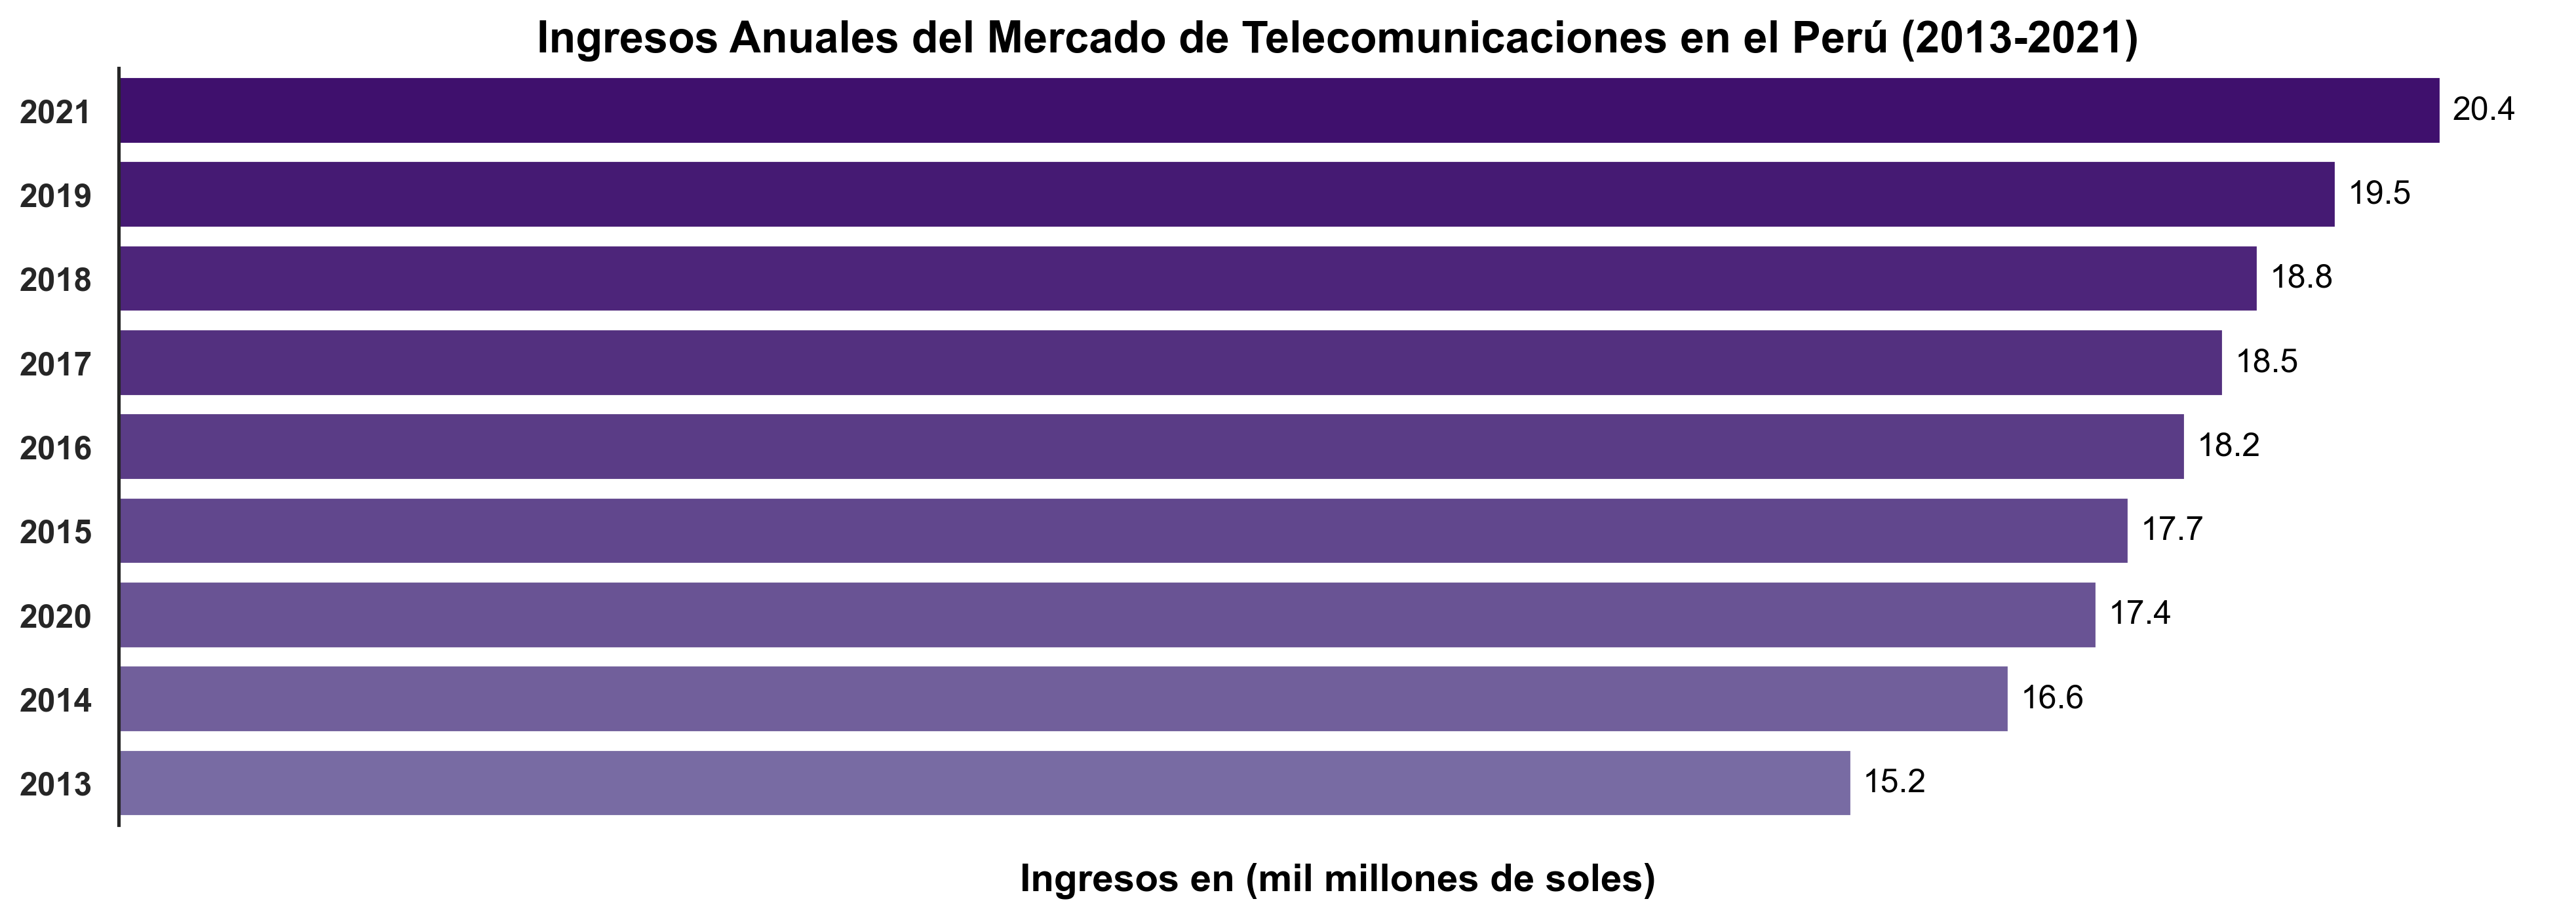

In [65]:
# Convertir los ingresos a mil millones
ingresos_total_anual = ingresos_total.copy()
ingresos_total_anual['Ingresos soles (mil millones)'] = ingresos_total_anual['Ingresos soles'] / 1000000000

# Ordenar por ingresos de mayor a menor
ingresos_total_anual = ingresos_total_anual.sort_values('Ingresos soles (mil millones)', ascending=False)

# Crear el gráfico de barras horizontal
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(16, 5), dpi=300)  # Tamaño de la figura y resolución
colors = plt.cm.Purples(np.linspace(1, 0.7, len(ingresos_total_anual)))  # Colores de las barras
ax = sns.barplot(
    x='Ingresos soles (mil millones)', 
    y='Año', 
    data=ingresos_total_anual, 
    palette=colors, 
    orient='h',
    order=ingresos_total_anual['Año']
)
sns.despine(left=False,bottom=True)  # Quitar los bordes de la gráfica
plt.xlabel('Ingresos en (mil millones de soles)', fontsize=14, color='black', weight='bold')
plt.ylabel('')
plt.title('Ingresos Anuales del Mercado de Telecomunicaciones en el Perú (2013-2021)', fontsize=16, color='black', weight='bold')
plt.gca().set_xticklabels([])
plt.yticks(fontsize=12, weight='bold')
# Añadir los valores encima de las barras
for index, value in enumerate(ingresos_total_anual['Ingresos soles (mil millones)']):
    ax.text(value+0.1, index, f'{value:.1f}', color='black', ha="left", va="center")

# Mostrar el gráfico
plt.show()

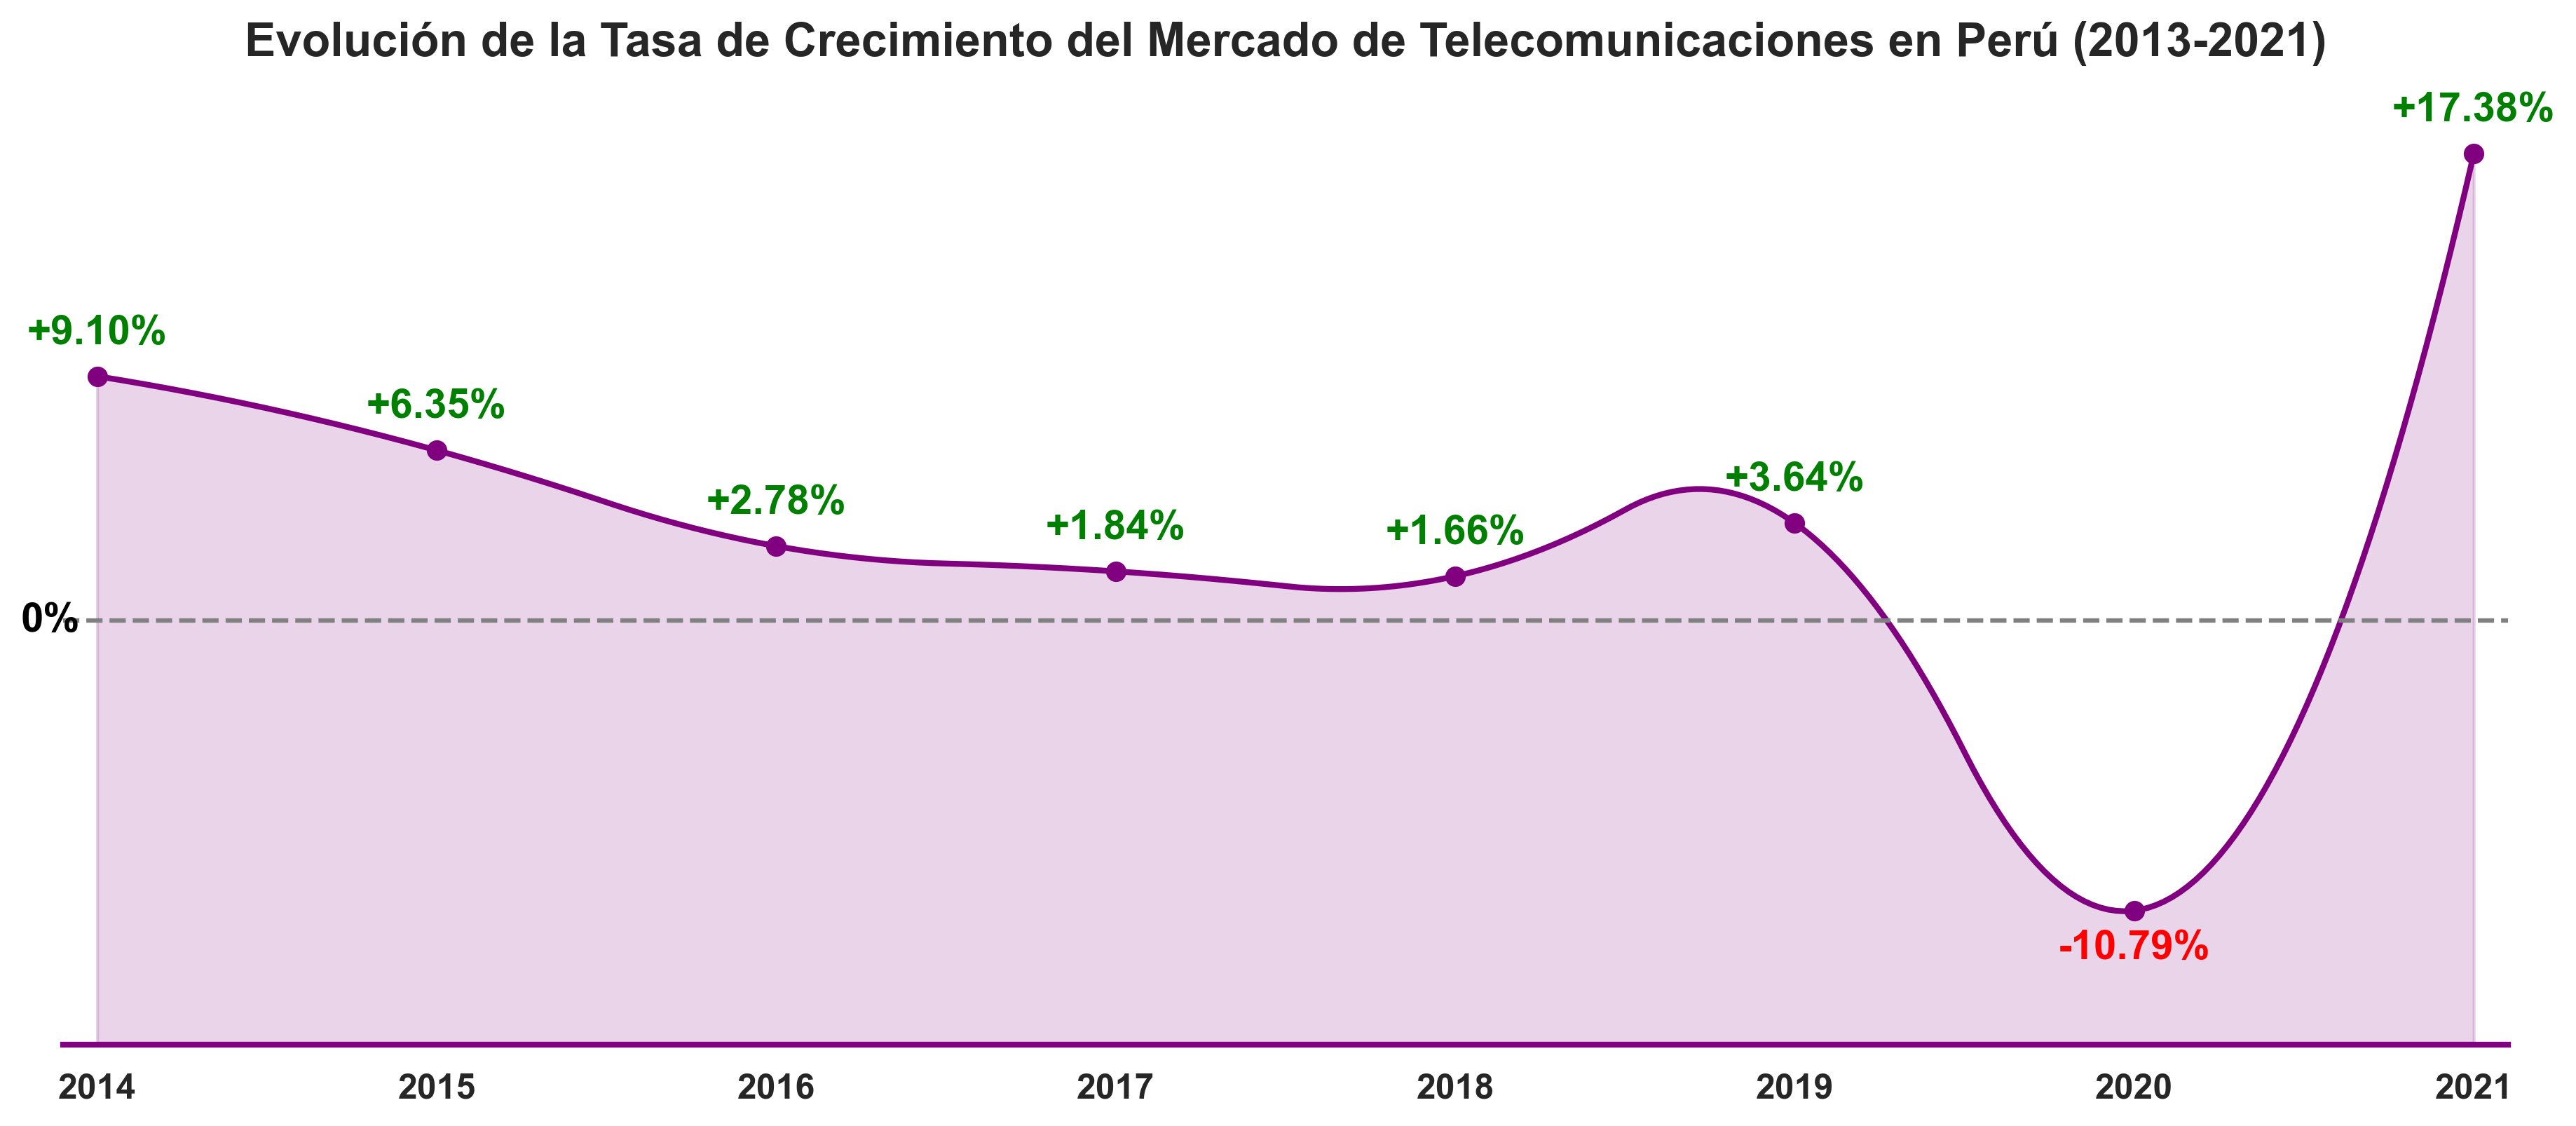

In [66]:
# Graficando la evolución
ingresos_total_df = ingresos_total_anual.dropna().sort_values(by='Año')
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(15, 6), dpi=300)
x = ingresos_total_df['Año']
y = ingresos_total_df['Tasa de crecimiento(%)']

# Crear una línea suavizada
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=2)  # B-spline de grado 2
y_smooth = spl(x_new)

plt.plot(x_new, y_smooth, color='purple', linewidth=2)
plt.scatter(x, y, color='purple')  # Puntos originales

# Añadir etiquetas a los puntos
for x_val, y_val in zip(x, y):
    if y_val > 0:
        plt.text(x_val, y_val + 0.9, f'+{y_val:.2f}%', ha='center', va='bottom', fontsize=14, weight='bold', color='green')
    else:
        plt.text(x_val, y_val - 0.7, f'{y_val:.2f}%', ha='center', va='top', fontsize=14, weight='bold', color='red')

# Ajustar los límites del eje y
plt.ylim(y.min() - 5, y.max() + 3)

# Ajustar los límites del eje x
plt.xlim(x.min()-0.1, x.max()+0.1)

# Crear un efecto desenfocado de color hacia abajo desde la línea del gráfico
ax = plt.gca()
ax.set_facecolor('white')
ax.patch.set_alpha(0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('purple')
    spine.set_linewidth(2)
    spine.set_visible(True)

# Rellenar el área bajo la curva con un gradiente de color uniforme
plt.fill_between(x_new, y_smooth, y.min() - 5, color='purple', alpha=0.17)

sns.despine(left=True)
plt.title('Evolución de la Tasa de Crecimiento del Mercado de Telecomunicaciones en Perú (2013-2021)', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.text(x.min()-0.05, 0, '0%', ha='right', va='center', fontsize=14, color='black', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.gca().set_yticklabels([])

# Mostrar el gráfico
plt.show()

### 📊 **Evolución del Crecimiento del Mercado de Telecomunicaciones en Perú (2013-2021)**

Este gráfico muestra la evolución de la **Tasa de Crecimiento** del mercado de telecomunicaciones en Perú entre 2013 y 2021. A continuación, señalaremos algunos puntos clave con stickers:

#### 📈 **Puntos de Crecimiento Positivo**
- **2014:** 🟢 **+9.10%** - Fuerte crecimiento al inicio del periodo.
- **2015:** 🟢 **+6.35%** - Sigue el crecimiento, aunque desacelera un poco.
- **2016:** 🟢 **+2.78%** - La tendencia de crecimiento continúa a la baja.
- **2017:** 🟢 **+1.84%** - Crecimiento mínimo, pero aún positivo.
- **2018:** 🟢 **+1.66%** - Se mantiene el crecimiento, aunque pequeño.
- **2019:** 🟢 **+3.64%** - Un ligero repunte en la tasa de crecimiento.
- **2021:** 🟢 **+17.38%** - 🤩 ¡Gran recuperación después de la caída en 2020!

#### 📉 **Punto de Crecimiento Negativo**
- **2020:** 🔴 **-10.79%** - 😓 La pandemia impacta fuertemente el mercado, con la mayor caída en el periodo.

#### 📌 **Observaciones Generales**
- El **pico más alto** de crecimiento ocurre en **2021** con un impresionante **+17.38%** tras la recuperación post-pandemia.
- La **caída más pronunciada** ocurre en **2020** con **-10.79%**, coincidiendo con la pandemia.
- A lo largo de los años, el mercado muestra una **tendencia descendente** desde **2014** hasta **2017**, con un pequeño repunte en **2019** y una **fuerte recuperación** en **2021**.

---

**Conclusión:**  
A pesar de la caída drástica en 2020, debido al impacto de la pandemia, el mercado de telecomunicaciones en Perú se recuperó significativamente en 2021, alcanzando una tasa de crecimiento sin precedentes en este período.

2. **Replicar el mismo gráfico solo para Claro**

In [67]:
# facturación anual del mercado de telecomunicaciones en el Perú por compañía en todas las lineas de negocio
ingresos_total_compañias_anual = ingresos.groupby(['Año', 'Compañia']).agg({'Ingresos soles': 'sum'}).reset_index()
# facturación anual solo para claro
ingresos_claro = ingresos_total_compañias_anual[ingresos_total_compañias_anual['Compañia'] == 'Claro']
ingresos_claro['Tasa de crecimiento(%)'] = ingresos_claro['Ingresos soles'].pct_change() * 100  # tasa de crecimiento anual evolución de los ingresos
print(f'Anualmente Claro factura en promedio {int(ingresos_claro["Ingresos soles"].mean() / 1000000000)} mil millones de soles')
print(f'La tasa de crecimiento anual promedio de los ingresos de Claro es de {round(ingresos_claro["Tasa de crecimiento(%)"].mean(), 2)}%')
ingresos_claro

Anualmente Claro factura en promedio 5 mil millones de soles
La tasa de crecimiento anual promedio de los ingresos de Claro es de 3.39%


Año Compañia  Ingresos soles  Tasa de crecimiento(%)
0   2013    Claro      4922299998                     NaN
6   2014    Claro      5435843002               10.432989
12  2015    Claro      5456522486                0.380428
18  2016    Claro      5446446418               -0.184661
24  2017    Claro      5728623801                5.180945
30  2018    Claro      5856223769                2.227410
36  2019    Claro      6090842707                4.006318
42  2020    Claro      5222505451              -14.256439
48  2021    Claro      6231093740               19.312345

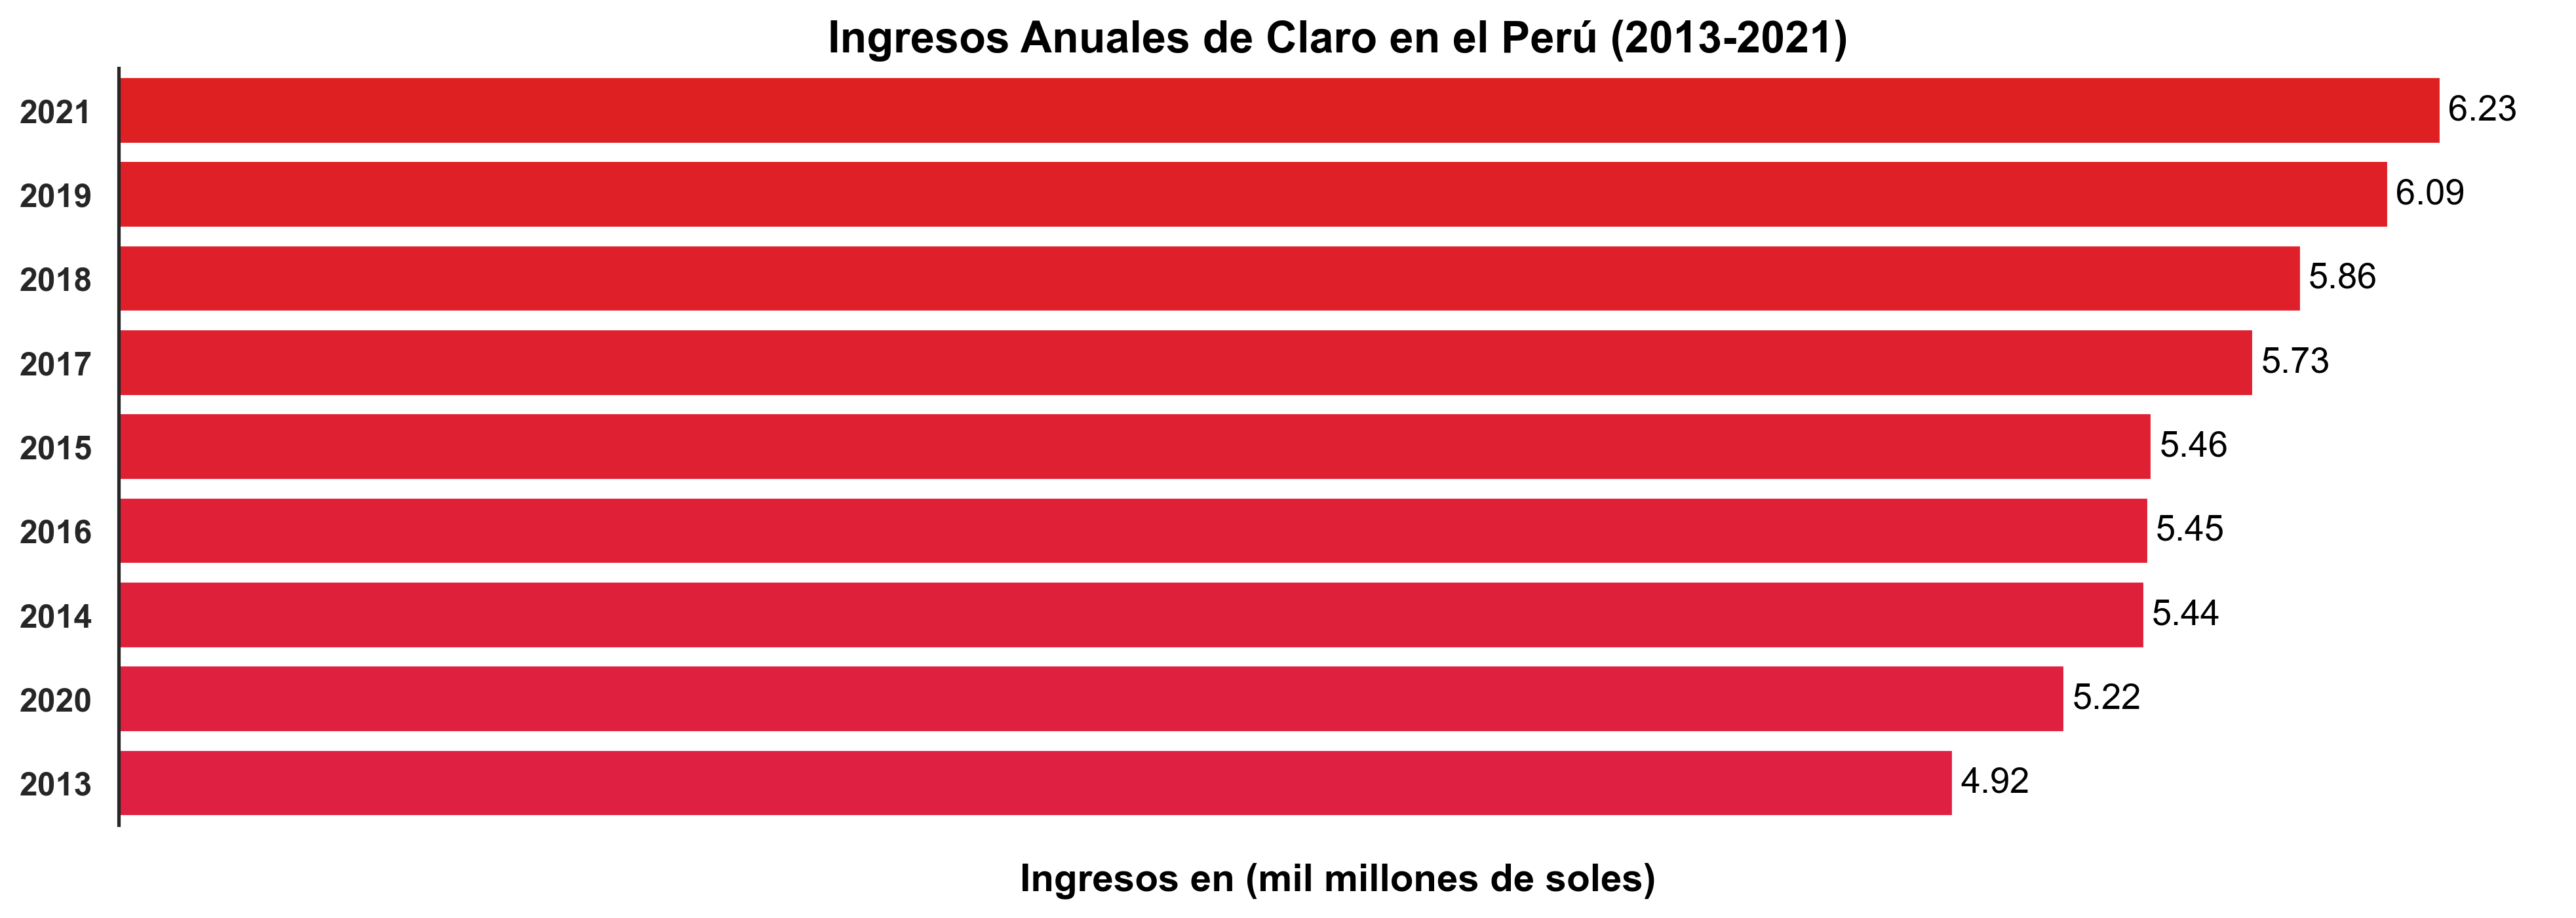

In [68]:
# Función para generar colores degradados
def generate_gradient(start_color, end_color, n):
    start = mcolors.hex2color(start_color)
    end = mcolors.hex2color(end_color)
    gradient = [mcolors.to_hex((start[0] + (end[0] - start[0]) * i / (n - 1),
                                start[1] + (end[1] - start[1]) * i / (n - 1),
                                start[2] + (end[2] - start[2]) * i / (n - 1)))
                for i in range(n)]
    return gradient

# Convertir los ingresos a mil millones
ingresos_claro_anual = ingresos_claro.copy()
ingresos_claro_anual['Ingresos soles (mil millones)'] = ingresos_claro_anual['Ingresos soles'] / 1000000000

# Ordenar por ingresos de mayor a menor
ingresos_claro_anual = ingresos_claro_anual.sort_values('Ingresos soles (mil millones)', ascending=False)

# Crear el gráfico de barras horizontal
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(16, 5), dpi=300)  # Tamaño de la figura y resolución

# Generar una lista de colores degradados
n_colors = len(ingresos_claro_anual)
colors = generate_gradient('#ff0003', '#ff002e', n_colors)

ax = sns.barplot(
    x='Ingresos soles (mil millones)', 
    y='Año', 
    data=ingresos_claro_anual, 
    palette=colors, 
    orient='h',
    order=ingresos_claro_anual['Año']
)
sns.despine(left=False, bottom=True)  # Quitar los bordes de la gráfica
plt.xlabel('Ingresos en (mil millones de soles)', fontsize=14, color='black', weight='bold')
plt.ylabel('')
plt.title('Ingresos Anuales de Claro en el Perú (2013-2021)', fontsize=16, color='black', weight='bold')
plt.gca().set_xticklabels([])
plt.yticks(fontsize=12, weight='bold')

# Añadir los valores encima de las barras
for index, value in enumerate(ingresos_claro_anual['Ingresos soles (mil millones)']):
    ax.text(value + 0.02, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=13)

# Mostrar el gráfico
plt.show()

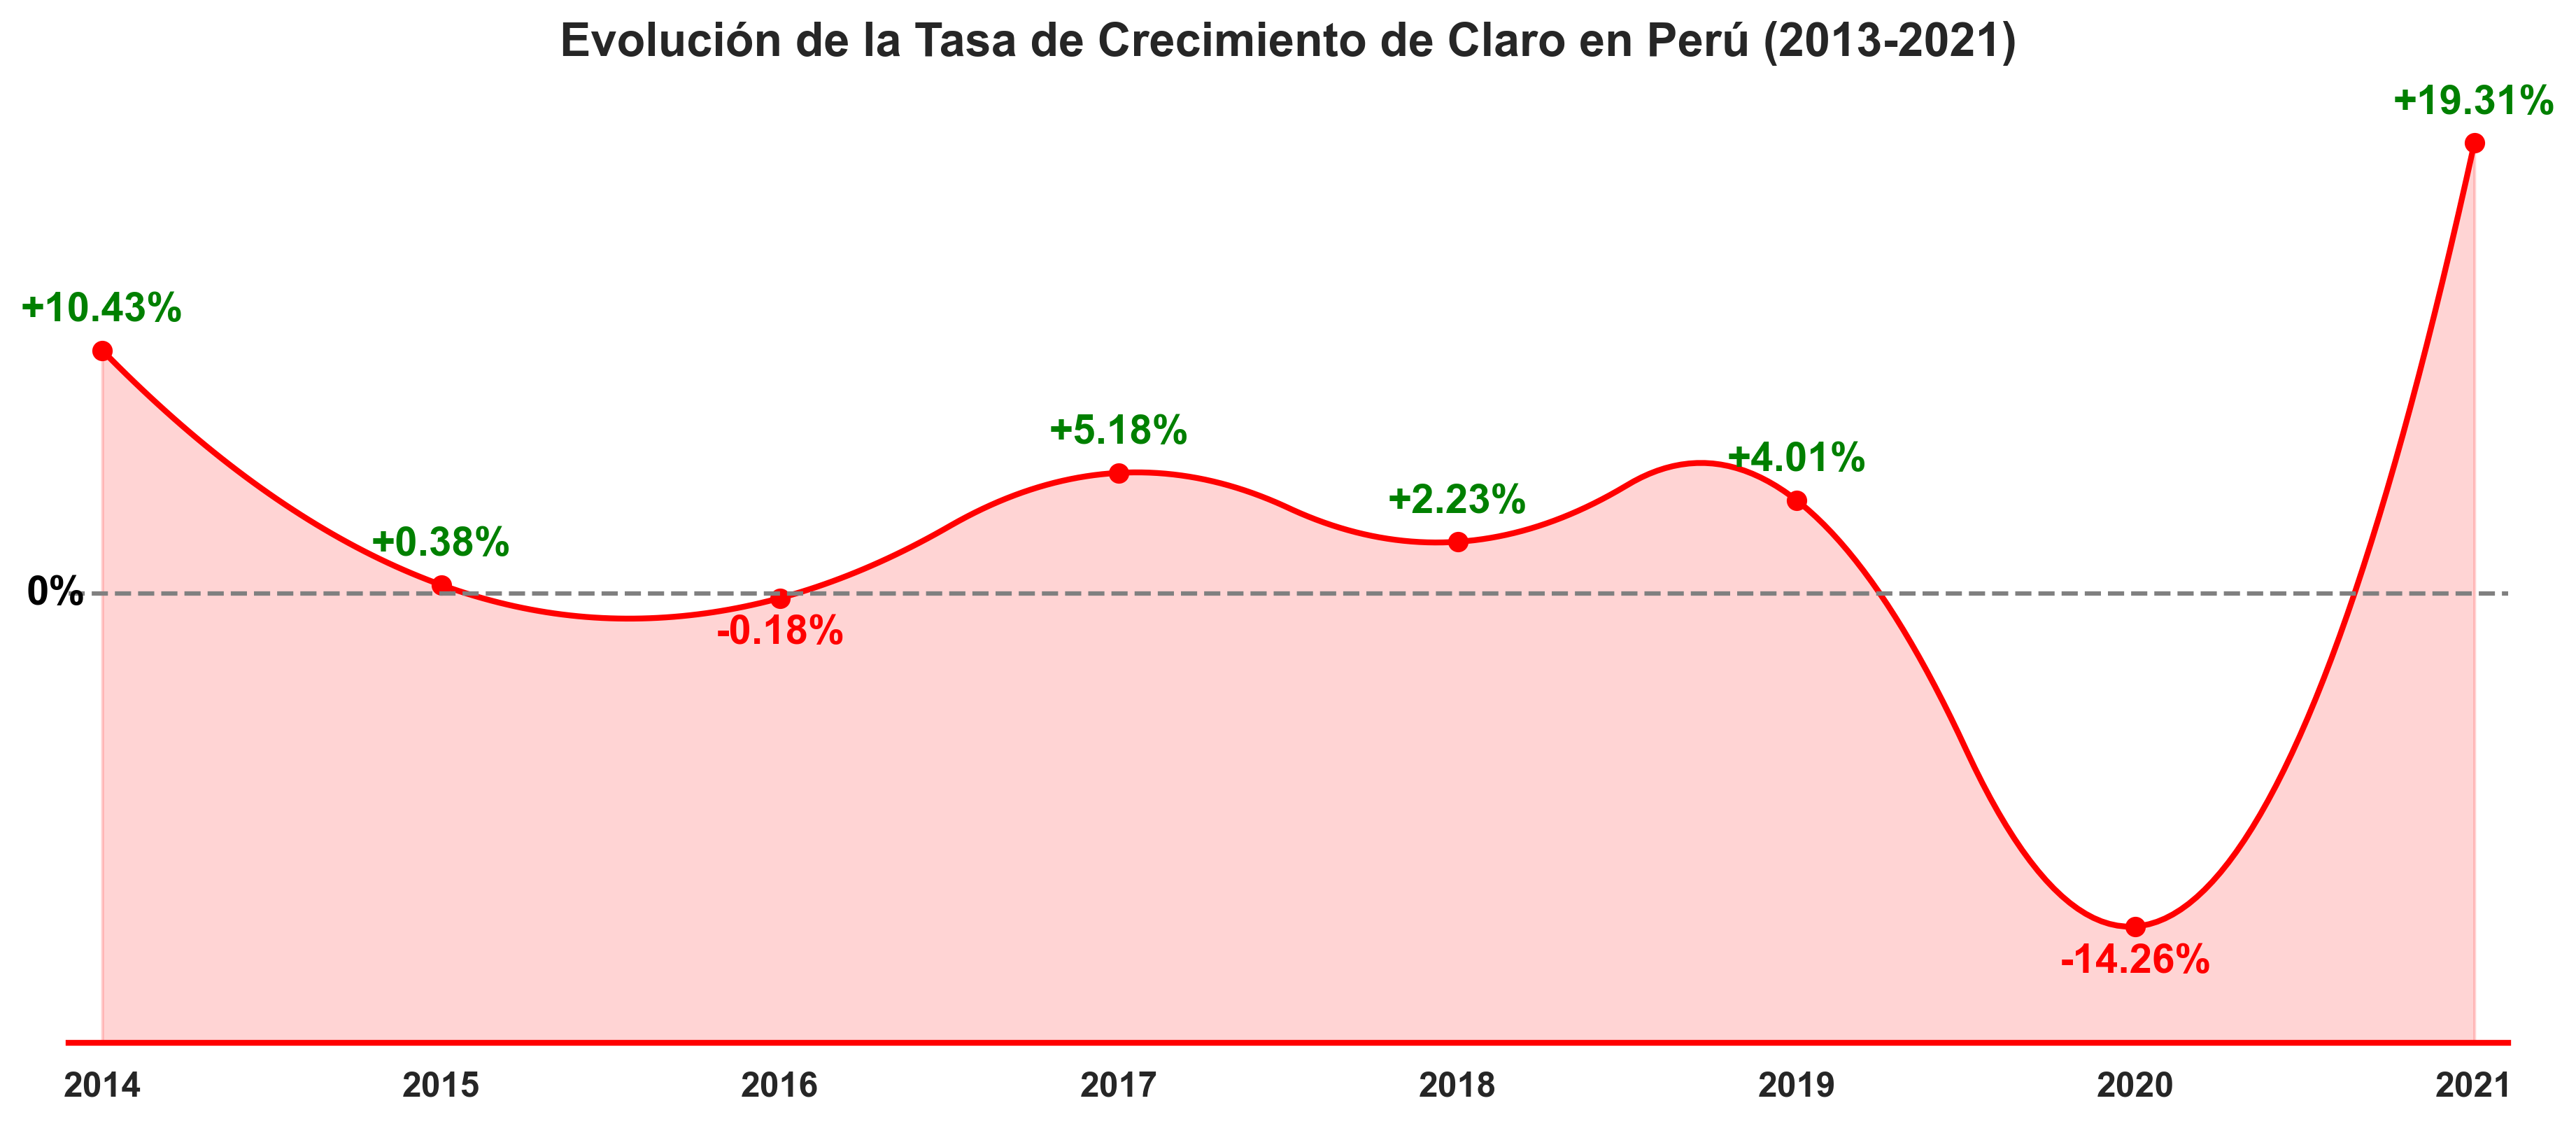

In [69]:
# Graficando la evolución para Claro
ingresos_claro_df = ingresos_claro.dropna().sort_values(by='Año')
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(15, 6), dpi=300)
x = ingresos_claro_df['Año']
y = ingresos_claro_df['Tasa de crecimiento(%)']

# Crear una línea suavizada
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=2)  # B-spline de grado 2
y_smooth = spl(x_new)

plt.plot(x_new, y_smooth, color='red', linewidth=2)
plt.scatter(x, y, color='red')  # Puntos originales

# Añadir etiquetas a los puntos
for x_val, y_val in zip(x, y):
    if y_val > 0:
        plt.text(x_val, y_val + 0.9, f'+{y_val:.2f}%', ha='center', va='bottom', fontsize=14, weight='bold', color='green')
    else:
        plt.text(x_val, y_val - 0.7, f'{y_val:.2f}%', ha='center', va='top', fontsize=14, weight='bold', color='red')

# Ajustar los límites del eje y
plt.ylim(y.min() - 5, y.max() + 3)

# Ajustar los límites del eje x
plt.xlim(x.min()-0.1, x.max()+0.1)

# Crear un efecto desenfocado de color hacia abajo desde la línea del gráfico
ax = plt.gca()
ax.set_facecolor('white')
ax.patch.set_alpha(0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('red')
    spine.set_linewidth(2)
    spine.set_visible(True)

# Rellenar el área bajo la curva con un gradiente de color uniforme
plt.fill_between(x_new, y_smooth, y.min() - 5, color='red', alpha=0.17)

sns.despine(left=True)
plt.title('Evolución de la Tasa de Crecimiento de Claro en Perú (2013-2021)', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.text(x.min()-0.05, 0, '0%', ha='right', va='center', fontsize=14, color='black', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.gca().set_yticklabels([])

# Mostrar el gráfico
plt.show()

### **📊 Evolución del Crecimiento de Claro en Perú (2013-2021)**  

Este gráfico muestra la **Tasa de Crecimiento** de Claro en Perú entre 2013 y 2021. A continuación, se destacan los puntos más relevantes:

#### **📈 Puntos de Crecimiento Positivo**
- **2014:** 🟢 **+10.43%** - Un inicio sólido con un crecimiento fuerte.
- **2015:** 🟢 **+0.38%** - Crecimiento mínimo, pero aún positivo.
- **2017:** 🟢 **+5.18%** - Buen repunte después de una ligera caída en 2016.
- **2018:** 🟢 **+2.23%** - El crecimiento se mantiene estable, aunque moderado.
- **2019:** 🟢 **+4.01%** - Otro repunte al alza antes de la caída de 2020.
- **2021:** 🟢 **+19.31%** - 🤩 ¡Recuperación impresionante después del golpe en 2020!

#### **📉 Punto de Crecimiento Negativo**
- **2016:** 🔴 **-0.18%** - Pequeña contracción, casi inapreciable.
- **2020:** 🔴 **-14.26%** - 😓 Impacto severo debido a la pandemia, la mayor caída observada.

#### **📌 Observaciones Generales**
- El **pico más alto** de crecimiento ocurre en **2021** con **+19.31%**, mostrando una clara recuperación tras la crisis.
- La **caída más pronunciada** ocurre en **2020** con un **-14.26%**, posiblemente debido al impacto de la pandemia.
- Desde **2014**, Claro muestra una **tendencia fluctuante**, con un crecimiento positivo y caídas ocasionales, especialmente en **2016** y **2020**.

---

**Conclusión:**  
A pesar del fuerte retroceso en **2020**, Claro experimenta una **recuperación significativa** en **2021**, alcanzando su tasa de crecimiento más alta en el período observado.

3. **¿Cual es el % de ingresos del mercado de los 6 competidores tanto en 2013 como en 2021?**

In [70]:
# Calculando el porcentaje de participación de mercado de los 6 competidores en el mercado de telecomunicaciones en el Perú
ingresos_compañias = ingresos.groupby(['Año', 'Compañia']).agg({'Ingresos soles': 'sum'}).reset_index()
ingresos_compañias['Porcentaje de participación(%)'] = ingresos_compañias.groupby('Año')['Ingresos soles'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
ingresos_compañias.head()

Año  Compañia  Ingresos soles  Porcentaje de participación(%)
0  2013     Claro      4922299998                       32.286927
1  2013  DirectTV       190496464                        1.249527
2  2013     Entel       824485891                        5.408065
3  2013  Movistar      8829692000                       57.916751
4  2013     Otros       478514778                        3.138730

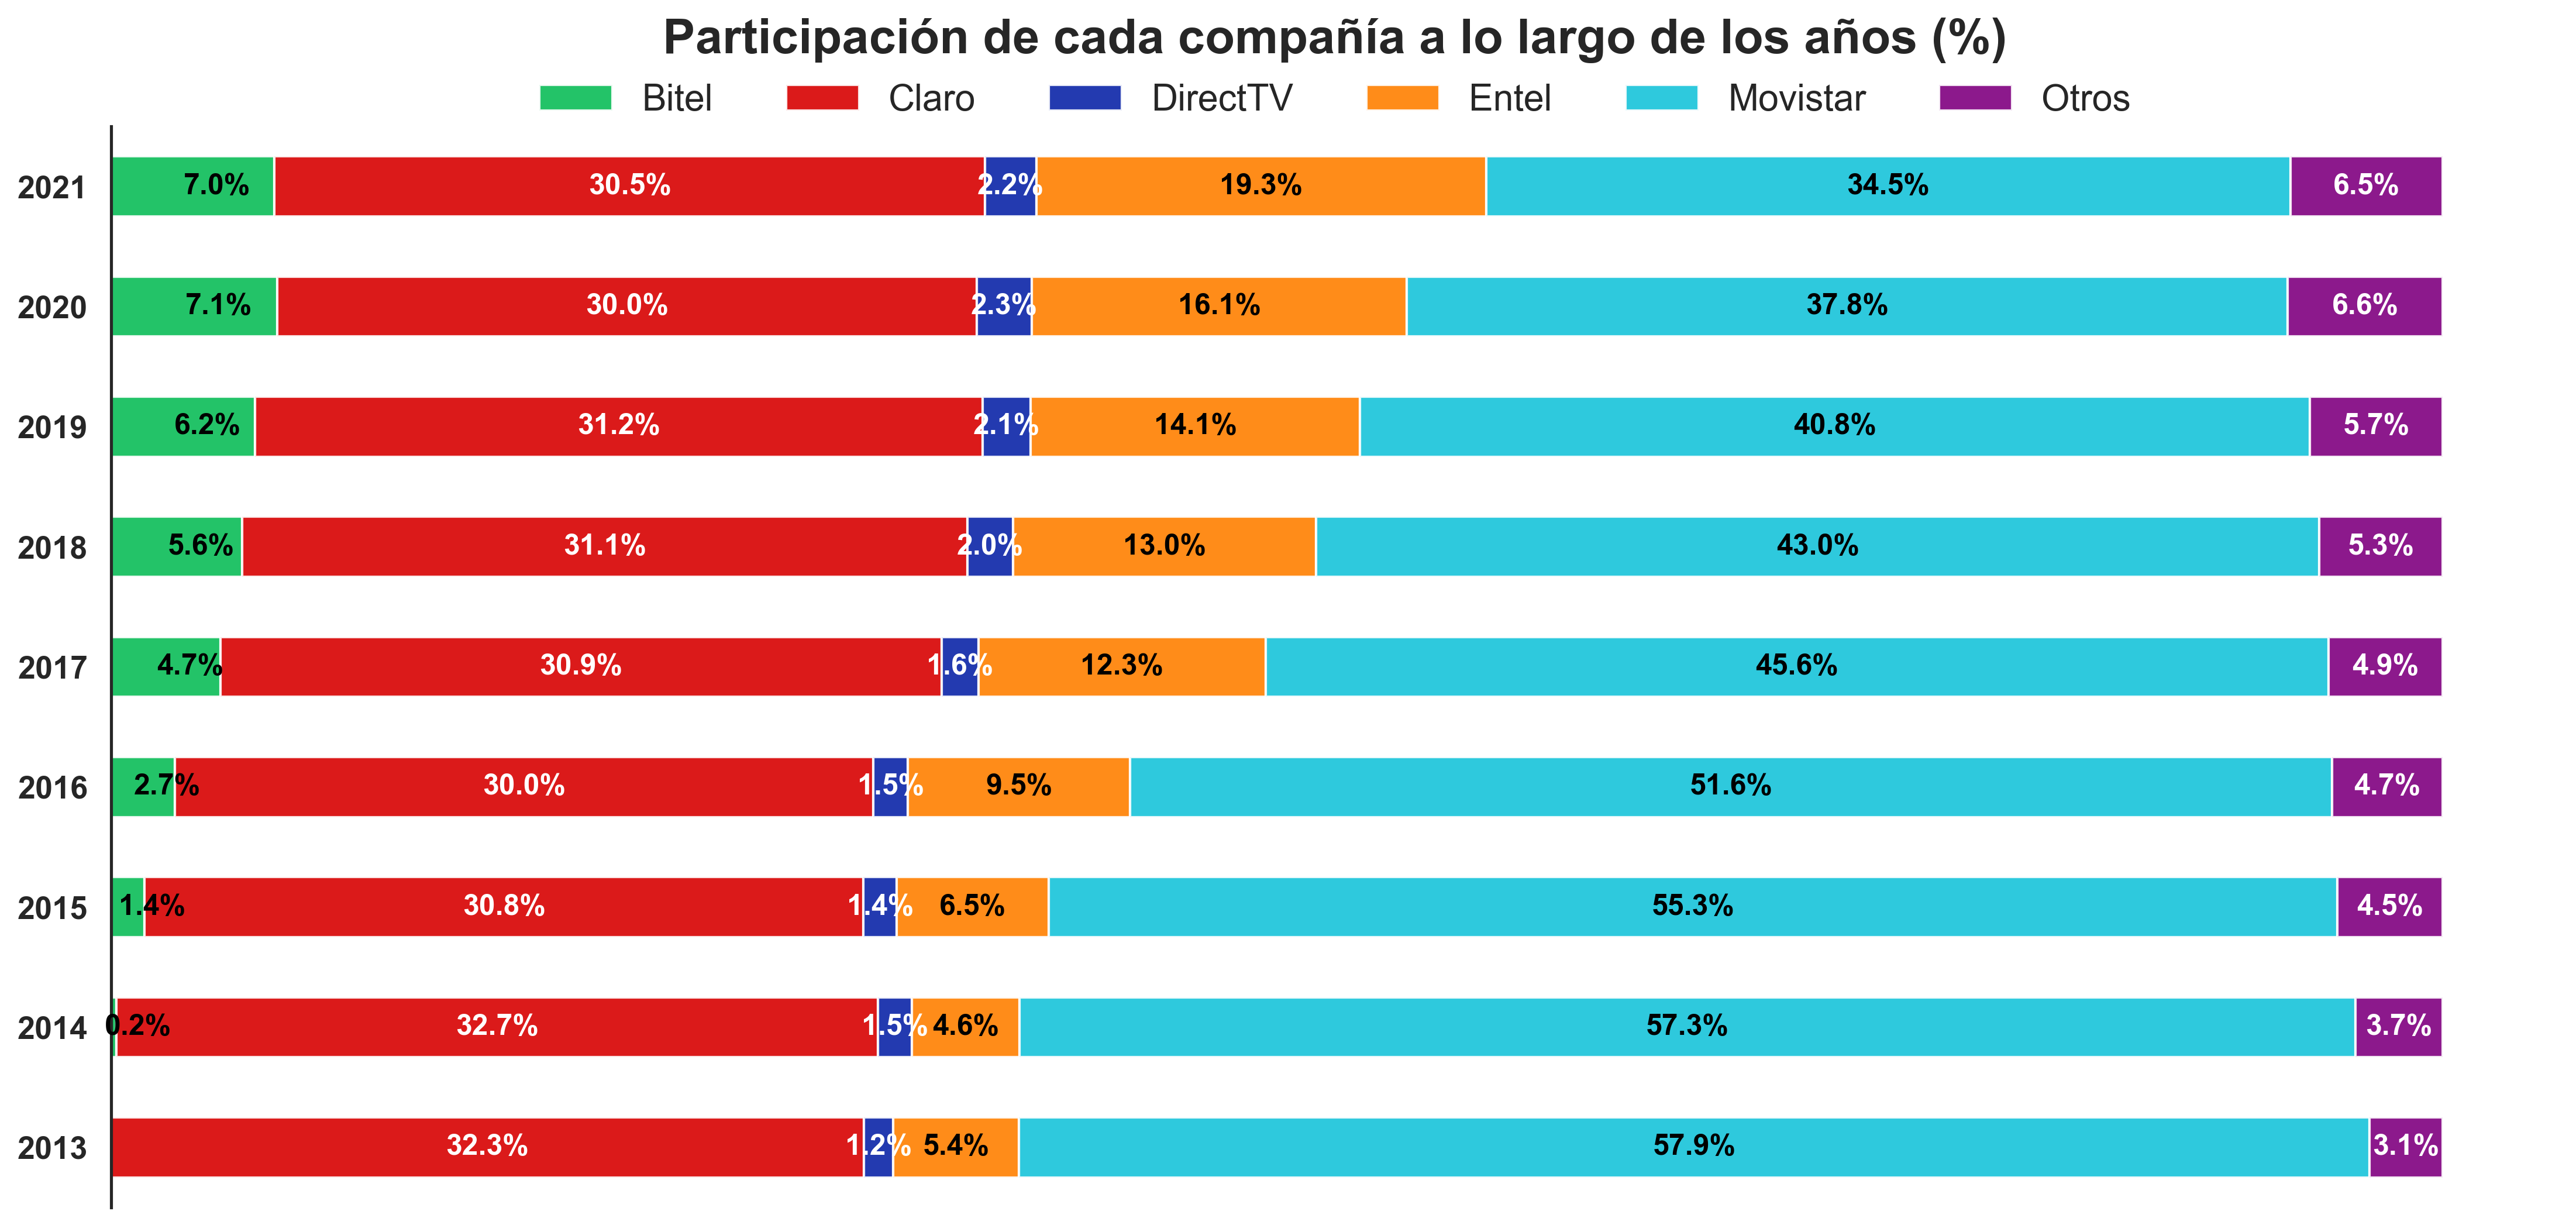

In [71]:
# Gráfico de barras apiladas de la participación de mercado de las compañías de telecomunicaciones en Perú
df_pivot = ingresos_compañias.pivot(index='Año', columns='Compañia', values='Porcentaje de participación(%)').fillna(0)
# Definir una lista de colores personalizados
colors = {
    'Bitel': '#0bbd58',
    'Claro': '#d80101',
    'DirectTV': '#0b24a8',
    'Entel': '#ff8000',
    'Movistar': '#17c3da',
    'Otros': '#800080'
}

# Crear el gráfico de barras apiladas vertical
sns.set_theme(style='white', palette='bright')
fig, ax = plt.subplots(figsize=(18, 8), dpi=300) 

# Crear las barras apiladas con mayor largo
df_pivot.plot(kind='barh', stacked=True, color=colors, ax=ax, alpha=0.9)  

# Añadir etiquetas y título
sns.despine(left=False, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participación de cada compañía a lo largo de los años (%)', fontsize=20, weight='bold', pad=30)  

# Añadir los porcentajes dentro de las barras
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    if container.get_label() in ['DirectTV', 'Claro','Otros']:
        ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=12, weight='bold')
    elif container.get_label() in ['Bitel']:
        ax.bar_label(container, labels=labels, label_type='center',padding=10, color='black', fontsize=12, weight='bold')
    else:
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=12, weight='bold')

# Mover la leyenda debajo del título
ax.legend(bbox_to_anchor=(0.5, 1.07), loc='upper center', ncol=6, fontsize=15, facecolor='white', edgecolor='white')
plt.gca().set_xticklabels([])
#ax.spines['left'].set_position(('outward', 10))
plt.yticks(fontsize=13, weight='bold')

# Mostrar el gráfico
plt.show()


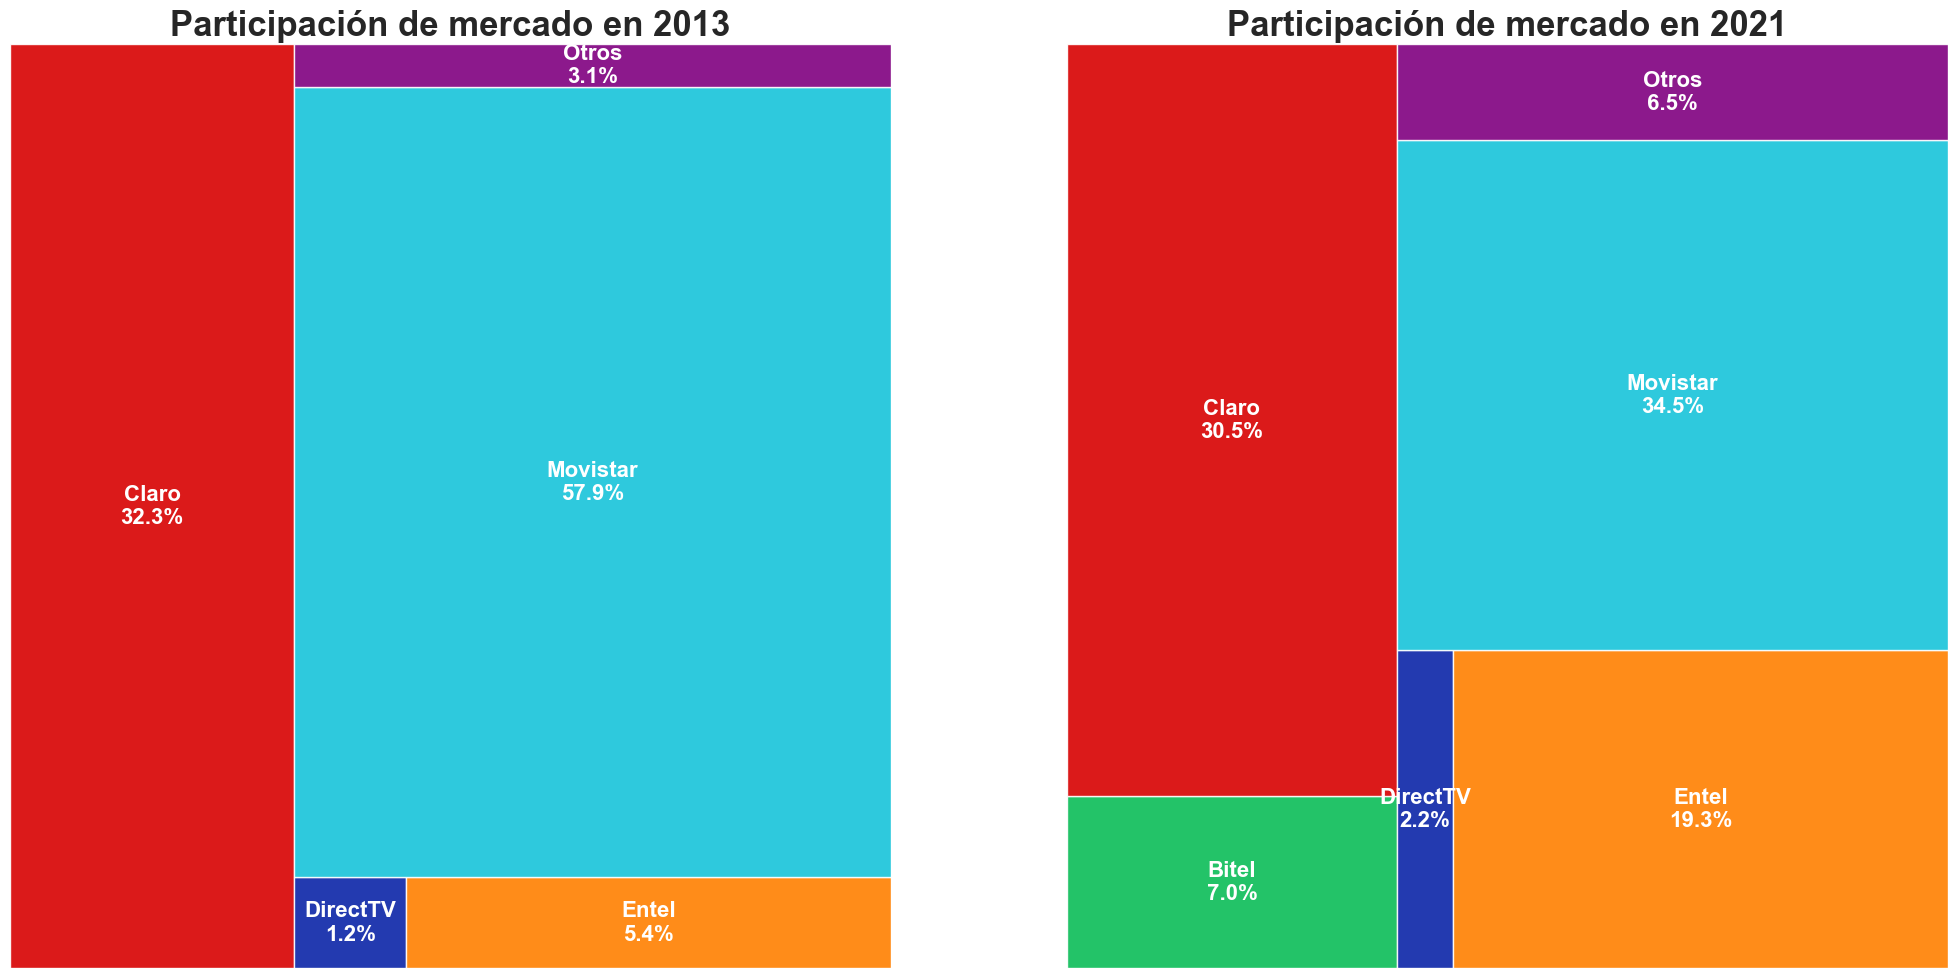

In [72]:
# Filtrar los datos para los años 2013 y 2021
df_filtered = ingresos_compañias[ingresos_compañias['Año'].isin([2013, 2021])]

# Pivotar el DataFrame para tener los años como índice y las compañías como columnas
df_pivot = df_filtered.pivot(index='Año', columns='Compañia', values='Porcentaje de participación(%)').fillna(0)

# Definir los colores para las compañías
colors = {
    'Bitel': '#0bbd58',
    'Claro': '#d80101',
    'DirectTV': '#0b24a8',
    'Entel': '#ff8000',
    'Movistar': '#17c3da',
    'Otros': '#800080'
}

# Crear el TreeMap para 2013 y 2021
fig, axes = plt.subplots(1, 2, figsize=(25, 12))

for ax, year in zip(axes, [2013, 2021]):
    values = df_pivot.loc[year].values
    labels = [f"{k}\n{v:.1f}%" for k, v in df_pivot.loc[year].items()]
    color_list = [colors[k] for k in df_pivot.loc[year].index]
    
    # Filtrar valores cero
    non_zero_values = [v for v in values if v > 0]
    non_zero_labels = [labels[i] for i in range(len(values)) if values[i] > 0]
    non_zero_colors = [color_list[i] for i in range(len(values)) if values[i] > 0]
    
    squarify.plot(sizes=non_zero_values, label=non_zero_labels, color=non_zero_colors, ax=ax,alpha=0.9, text_kwargs={'fontsize': 16, 'weight': 'bold', 'color': 'white'})
    ax.set_title(f'Participación de mercado en {year}', fontsize=25, weight='bold')
    ax.axis('off')

# Mostrar el gráfico
plt.show()

### **📊 Participación de Mercado en 2013 vs 2021**

A continuación, se presenta un análisis comparativo de la **participación de mercado** entre **2013** y **2021** en el sector de telecomunicaciones en Perú.

#### **📅 Participación en 2013**
- **Movistar:** 🟦 **57.9%** - Dominio claro del mercado en 2013, con la mayor cuota.
- **Claro:** 🔴 **32.3%** - Segunda posición con una participación significativa.
- **Entel:** 🟠 **5.4%** - Una presencia moderada en el mercado.
- **DirectTV:** 🔵 **1.2%** - Muy pequeña participación en el mercado.
- **Otros:** 🟣 **3.1%** - Otras empresas con un porcentaje menor.

#### **📅 Participación en 2021**
- **Movistar:** 🟦 **34.5%** - Aunque sigue siendo el líder, su cuota de mercado ha disminuido considerablemente.
- **Claro:** 🔴 **30.5%** - Mantiene una posición fuerte, aunque con una ligera disminución respecto a 2013.
- **Entel:** 🟠 **19.3%** - Gran crecimiento comparado con 2013, casi cuadriplicando su participación.
- **Bitel:** 🟩 **7.0%** - Nueva presencia significativa en el mercado para 2021.
- **DirectTV:** 🔵 **2.2%** - Aumento leve en su cuota de mercado.
- **Otros:** 🟣 **6.5%** - Las empresas más pequeñas han ganado más presencia en el mercado.

#### **📌 Observaciones Generales**
- **Movistar** ha mantenido su liderazgo, pero ha perdido una gran parte de su cuota de mercado (-23.4 puntos porcentuales).
- **Claro** sigue siendo el segundo jugador más grande, aunque su participación ha disminuido ligeramente (-1.8 puntos porcentuales).
- **Entel** ha experimentado un **crecimiento explosivo**, pasando del **5.4%** en 2013 a **19.3%** en 2021.
- **Bitel** no estaba presente en 2013, pero para 2021 ha captado un **7.0%** del mercado.
- Las categorizadas como **Otros** también han crecido, duplicando su participación de **3.1%** en 2013 a **6.5%** en 2021.

#### **📈 Conclusión:**
El mercado de telecomunicaciones en Perú ha experimentado cambios significativos entre **2013** y **2021**, con una mayor diversificación. Los principales protagonistas como **Movistar** y **Claro** han perdido participación en favor de competidores más nuevos como **Entel** y **Bitel**, quienes han ganado terreno de manera importante.

4. **¿Cuánto es el % de la facturación para cada linea de producto para el mercado total? ¿Cómo evoluciona entre 2013 y 2021?**

In [73]:
# Agrupar los ingresos por año y línea de producto
ingresos_lineas_negocio = ingresos.groupby(['Año', 'Linea de producto']).agg({'Ingresos soles': 'sum'}).reset_index()
# Calcular el porcentaje de participación de cada línea de producto en el total de ingresos por año
ingresos_lineas_negocio['Porcentaje de facturación(%)'] = ingresos_lineas_negocio.groupby('Año')['Ingresos soles'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
print(f'La linea de producto que más participación de mercado tiene en el Perú en el 2013 es {ingresos_lineas_negocio[ingresos_lineas_negocio["Año"] == 2013].sort_values("Porcentaje de facturación(%)", ascending=False).iloc[0, 1]}')
print(f'La linea de producto que más participación de mercado tiene en el Perú en el 2021 es {ingresos_lineas_negocio[ingresos_lineas_negocio["Año"] == 2021].sort_values("Porcentaje de facturación(%)", ascending=False).iloc[0, 1]}')
ingresos_lineas_negocio.head()


La linea de producto que más participación de mercado tiene en el Perú en el 2013 es Móvil
La linea de producto que más participación de mercado tiene en el Perú en el 2021 es Móvil


Año Linea de producto  Ingresos soles  Porcentaje de facturación(%)
0  2013           CableTV      1015124752                      6.658525
1  2013              Data       746966907                      4.899593
2  2013           Equipos      1281587915                      8.406342
3  2013     Interconexión       807141776                      5.294299
4  2013          Internet      1582650947                     10.381110

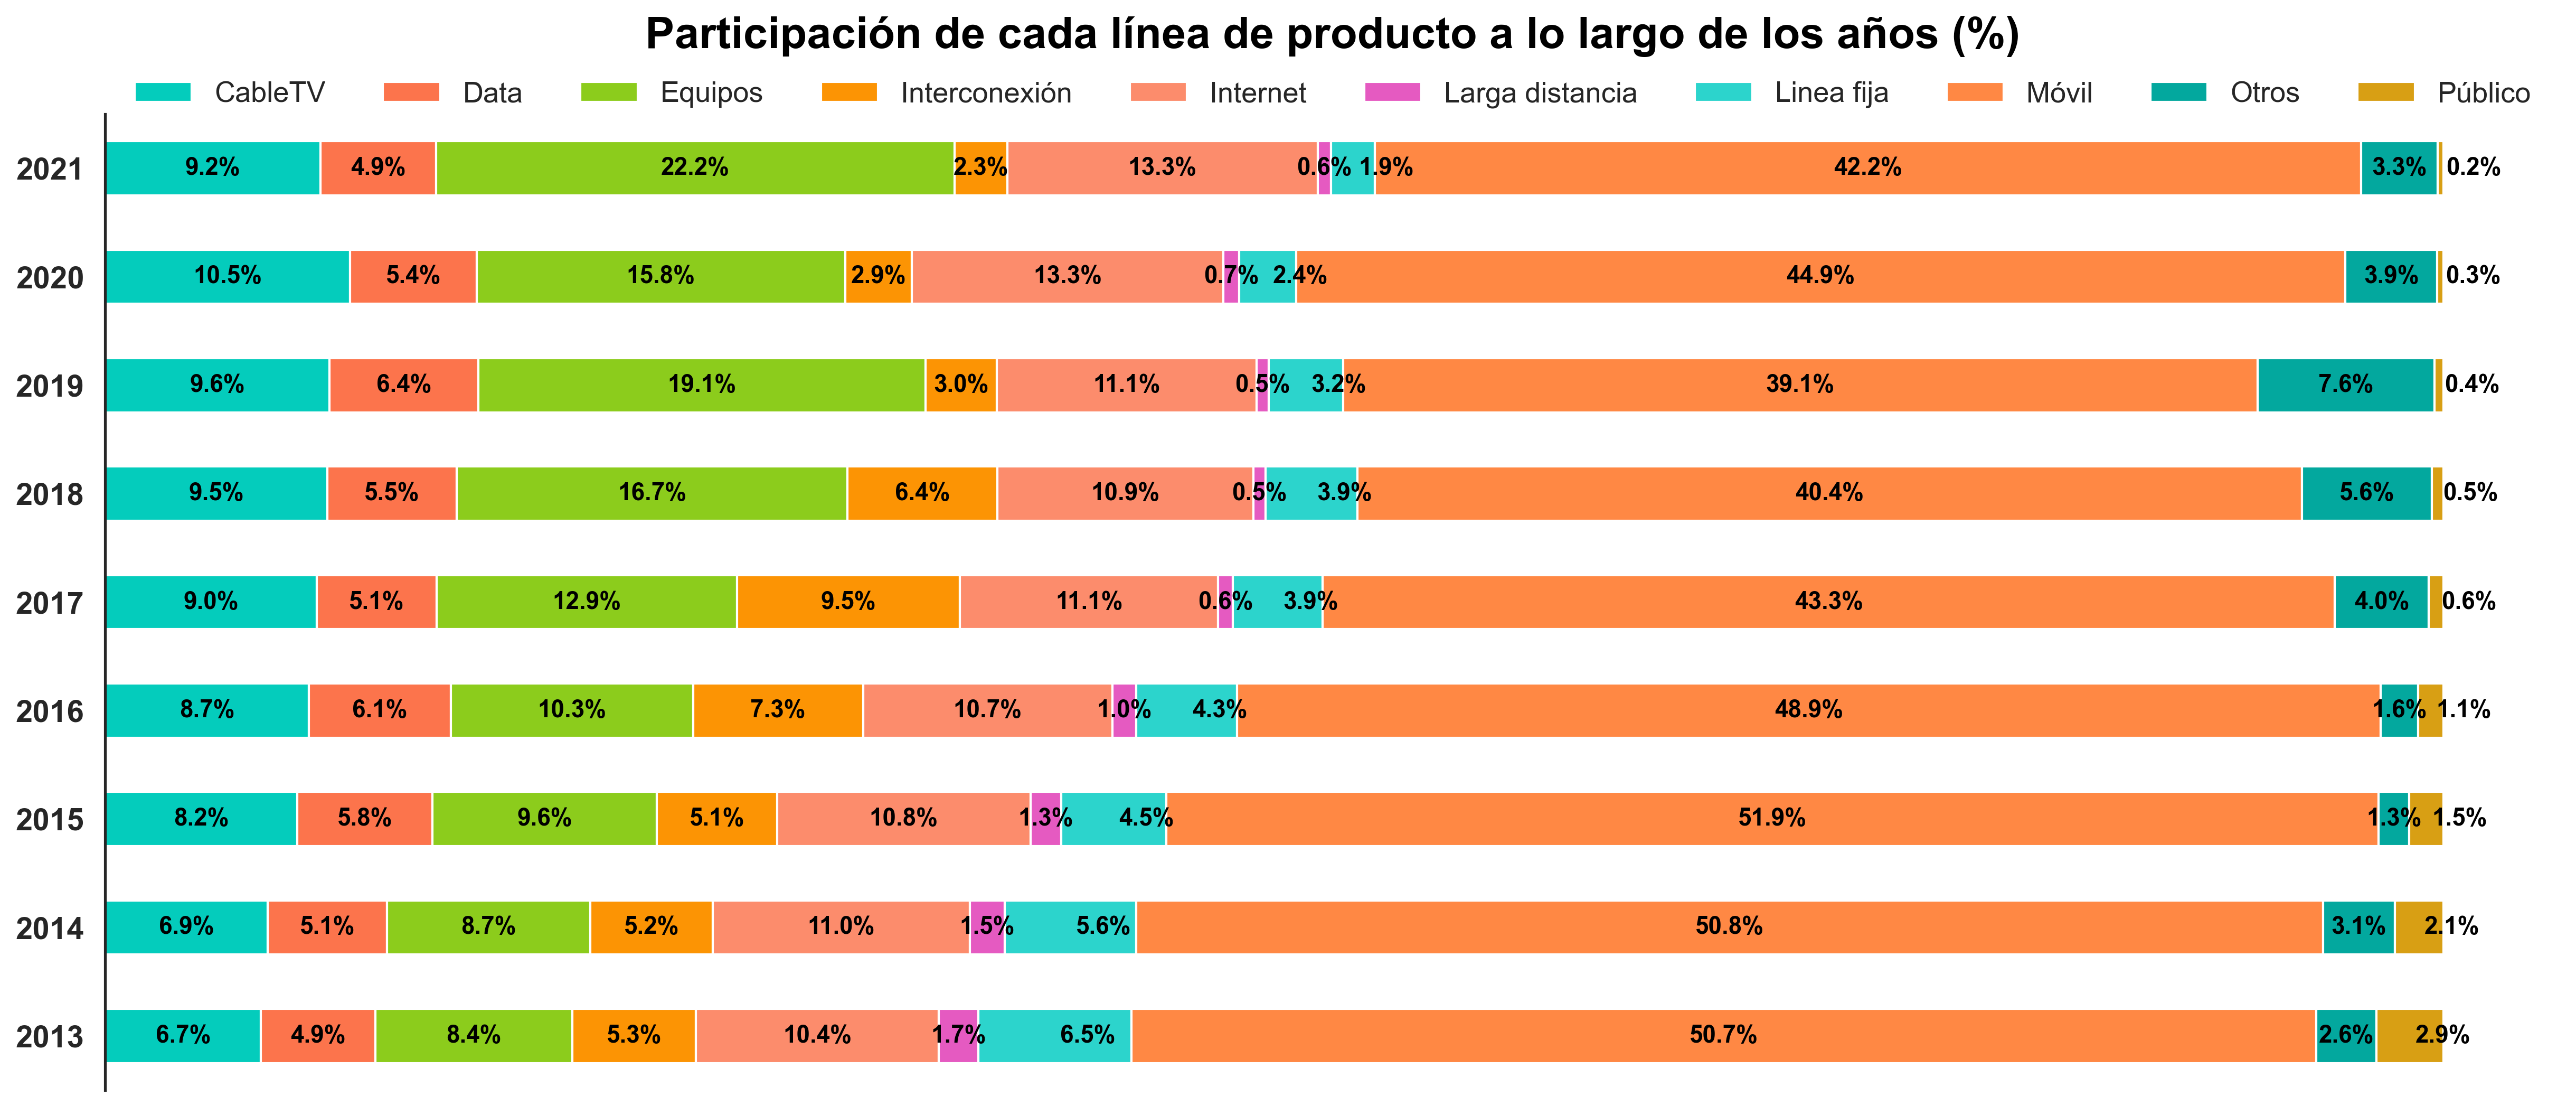

In [74]:
# Gráfico de barras apiladas de la participación de mercado de las líneas de negocio de telecomunicaciones en Perú
df_pivot = ingresos_lineas_negocio.pivot(index='Año', columns='Linea de producto', values='Porcentaje de facturación(%)').fillna(0)
colors = ['#04ccbc', '#fc744c', '#8ccc1c', '#fc9404', '#fc8c6c', '#e55ac1', '#2cd4cc', '#ff8844', '#03a89e', '#d89f14']
sns.set_theme(style='white', palette='bright')
fig, ax = plt.subplots(figsize=(20,8), dpi=300)
df_pivot.plot(kind='barh', stacked=True, color=colors, ax=ax)
sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participación de cada línea de producto a lo largo de los años (%)', fontsize=20, weight='bold', pad=30, color='black')
for container in ax.containers:
    if container.get_label() in ['Linea fija', 'Público']:
        labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center', padding=15, color='black', fontsize=11, weight='bold')
    else:
        labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=11, weight='bold')
# Mover la leyenda debajo del título
ax.legend(bbox_to_anchor=(0.5, 1.06), loc='upper center', ncol=10, fontsize=13, facecolor='white', edgecolor='white')
plt.xticks(fontsize=13, weight='bold')
sns.despine(left=False, bottom=True)
plt.gca().set_xticklabels([])
plt.yticks(fontsize=14, weight='bold')
# Mostrar el gráfico
plt.show()


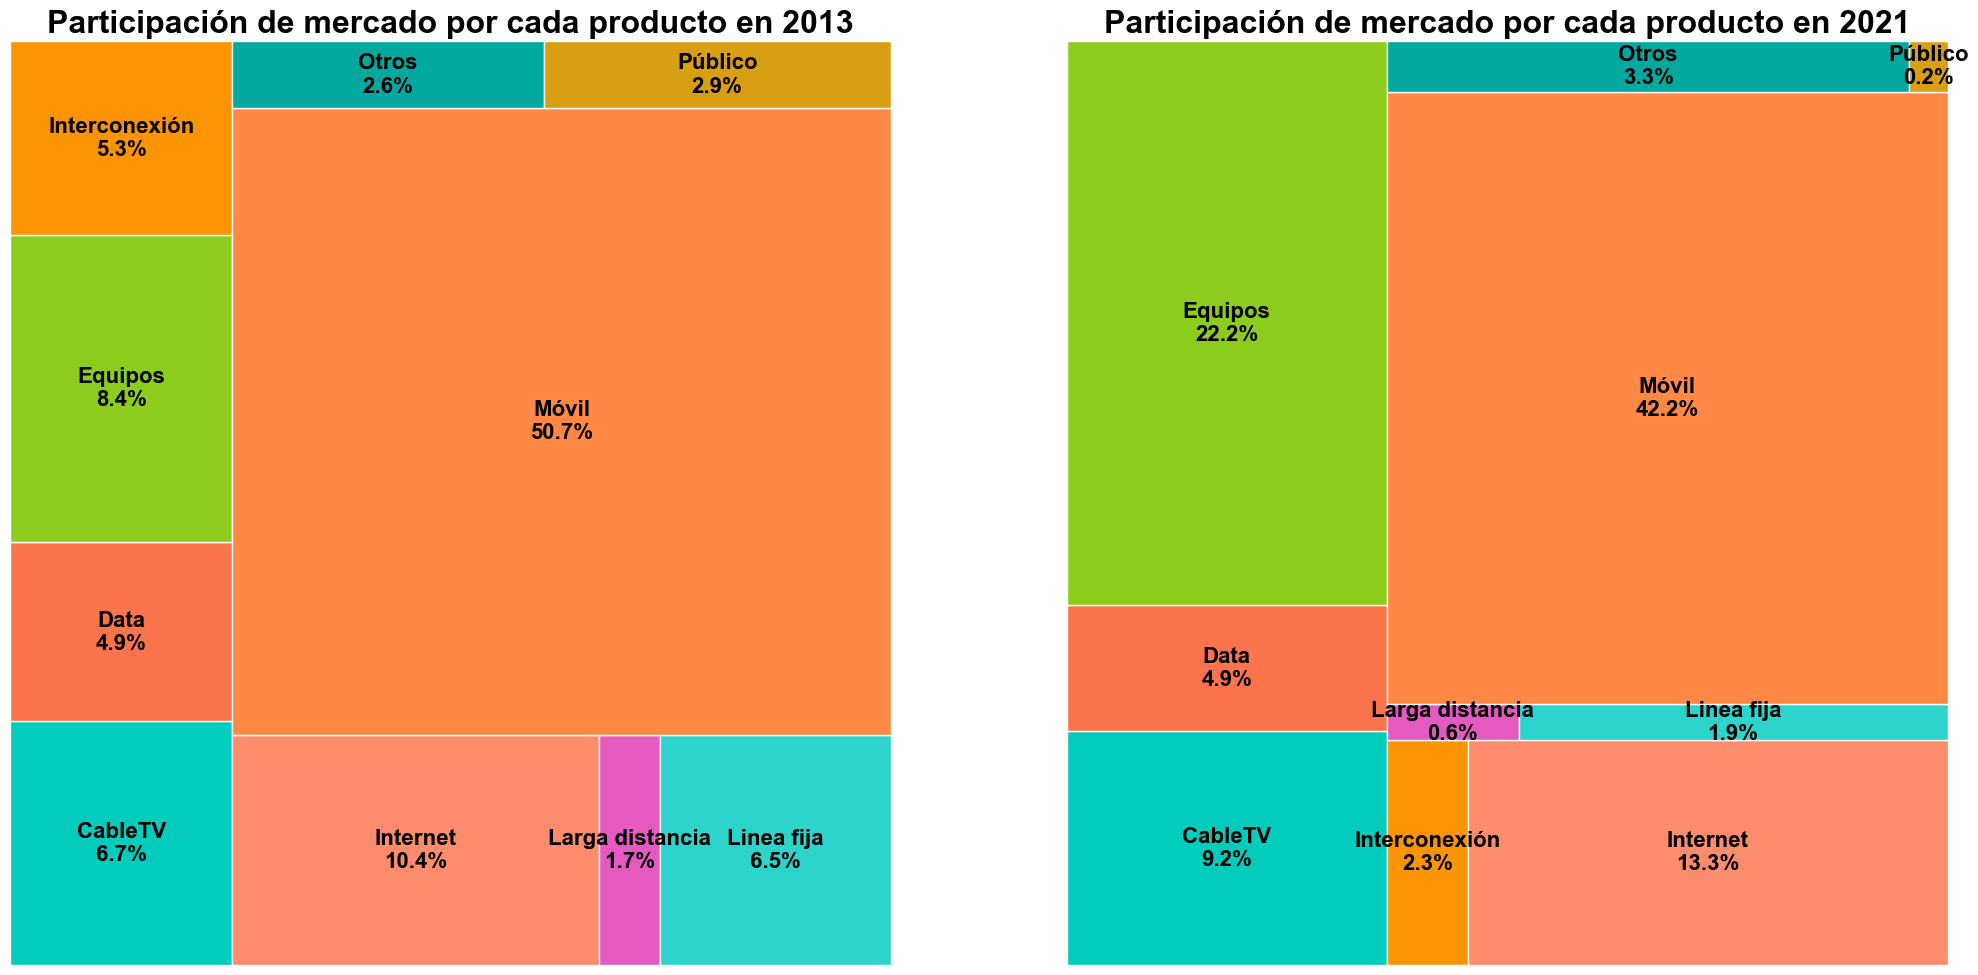

In [75]:
# Tree Map de la participación de mercado de las líneas de negocio en 2013 y 2021
df_filtered = ingresos_lineas_negocio[ingresos_lineas_negocio['Año'].isin([2013, 2021])]
df_pivot = df_filtered.pivot(index='Año', columns='Linea de producto', values='Porcentaje de facturación(%)').fillna(0)
colors = ['#04ccbc', '#fc744c', '#8ccc1c', '#fc9404', '#fc8c6c', '#e55ac1', '#2cd4cc', '#ff8844', '#03a89e', '#d89f14']
fig, axes = plt.subplots(1, 2, figsize=(25, 12))
for ax, year in zip(axes, [2013, 2021]):
    values = df_pivot.loc[year].values
    labels = [f"{k}\n{v:.1f}%" for k, v in df_pivot.loc[year].items()]
    color_list = colors
    non_zero_values = [v for v in values if v > 0]
    non_zero_labels = [labels[i] for i in range(len(values)) if values[i] > 0]
    non_zero_colors = [color_list[i] for i in range(len(values)) if values[i] > 0]
    squarify.plot(sizes=non_zero_values, label=non_zero_labels, color=non_zero_colors, ax=ax, text_kwargs={'fontsize': 16, 'weight': 'bold', 'color': 'black'})
    ax.set_title(f'Participación de mercado por cada producto en {year}', fontsize=23, weight='bold', color='black')
    ax.axis('off')
plt.show()

### **📊 Participación de Mercado por Servicios en 2013 vs 2021**

A continuación, se presenta un análisis comparativo de la **participación de mercado** por tipo de servicio entre **2013** y **2021** en el sector de telecomunicaciones en Perú.

#### **📅 Participación en 2013**
- **Móvil:** 🟧 **50.7%** - El servicio de mayor participación en 2013, dominando más de la mitad del mercado.
- **Internet:** 🟠 **10.4%** - Una porción significativa del mercado, aunque mucho menor que el móvil.
- **Cable TV:** 🟦 **6.7%** - Participación moderada en el mercado.
- **Equipos:** 🟩 **8.4%** - Una parte considerable del mercado proviene de la venta de equipos.
- **Data:** 🟫 **4.9%** - Participación pequeña pero estable, enfocada en servicios de datos.
- **Interconexión:** 🟧 **5.3%** - Una parte del mercado dedicada a la interconexión.
- **Línea Fija:** 🟪 **6.5%** - Aún relevante en 2013, aunque en declive.
- **Larga Distancia:** 🟪 **1.7%** - Un servicio en declive, con baja participación.
- **Público:** 🟨 **2.9%** - Servicios públicos con una pequeña porción del mercado.
- **Otros:** 🟦 **2.6%** - Otros servicios con una participación mínima.

#### **📅 Participación en 2021**
- **Móvil:** 🟧 **42.2%** - Sigue siendo el líder del mercado, aunque ha perdido participación (-8.5 puntos porcentuales).
- **Internet:** 🟠 **13.3%** - Ha crecido considerablemente (+2.9 puntos porcentuales), reflejando la demanda creciente de servicios de internet.
- **Cable TV:** 🟦 **9.2%** - Ligero crecimiento en comparación con 2013.
- **Equipos:** 🟩 **22.2%** - Un crecimiento significativo respecto a 2013 (+13.8 puntos porcentuales), mostrando el aumento en la adquisición de dispositivos.
- **Data:** 🟫 **4.9%** - Se mantiene constante en su participación.
- **Interconexión:** 🟧 **2.3%** - Ha disminuido significativamente respecto a 2013.
- **Línea Fija:** 🟪 **1.9%** - Gran caída en comparación con 2013, evidenciando el declive de este servicio.
- **Larga Distancia:** 🟪 **0.6%** - Este servicio ha perdido casi toda su relevancia en el mercado.
- **Público:** 🟨 **0.2%** - Casi desaparecido del mercado en 2021.
- **Otros:** 🟦 **3.3%** - Ligero aumento en la participación de otros servicios.

#### **📌 Observaciones Generales**
- **Móvil** sigue dominando el mercado, aunque ha perdido participación (-8.5 puntos porcentuales) en favor de otros servicios.
- **Equipos** ha crecido notablemente, pasando de **8.4%** en 2013 a **22.2%** en 2021, lo que refleja el aumento de la demanda de dispositivos móviles y tecnológicos.
- **Internet** también ha visto un crecimiento importante, subiendo del **10.4%** en 2013 a **13.3%** en 2021, impulsado por la mayor demanda de conectividad.
- **Línea Fija** y **Larga Distancia** han disminuido significativamente, lo que refleja el cambio hacia servicios más modernos y digitales.
- **Público** prácticamente ha desaparecido del mercado, pasando de **2.9%** a **0.2%**.
- La categoría de **Otros** ha crecido ligeramente, lo que podría incluir la diversificación en nuevos servicios.

#### **📈 Conclusión:**
El mercado de telecomunicaciones en Perú ha experimentado una **transformación significativa** entre **2013** y **2021**, con un crecimiento notable en la venta de **equipos** y una mayor participación de **Internet**. Los servicios tradicionales como **Línea Fija** y **Larga Distancia** han perdido relevancia en favor de servicios digitales y móviles.

5. **¿Cuánto es el % de la facturación para cada linea de producto para Claro? ¿Cómo evoluciona entre 2013 y 2021?**

In [76]:
# Facturación anual para cada linea de producto para claro en el Perú
ingresos_claro_lineas_negocio = ingresos[ingresos['Compañia'] == 'Claro'].groupby(['Año', 'Linea de producto']).agg({'Ingresos soles': 'sum'}).reset_index()
ingresos_claro_lineas_negocio['Porcentaje de facturación(%)'] = ingresos_claro_lineas_negocio.groupby('Año')['Ingresos soles'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
print(f'La linea de producto que más participación de mercado tiene en Claro en el Perú en el 2013 es {ingresos_claro_lineas_negocio[ingresos_claro_lineas_negocio["Año"] == 2013].sort_values("Porcentaje de facturación(%)", ascending=False).iloc[0, 1]}')
print(f'La linea de producto que más participación de mercado tiene en Claro en el Perú en el 2021 es {ingresos_claro_lineas_negocio[ingresos_claro_lineas_negocio["Año"] == 2021].sort_values("Porcentaje de facturación(%)", ascending=False).iloc[0, 1]}')
ingresos_claro_lineas_negocio.head()

La linea de producto que más participación de mercado tiene en Claro en el Perú en el 2013 es Móvil
La linea de producto que más participación de mercado tiene en Claro en el Perú en el 2021 es Móvil


Año Linea de producto  Ingresos soles  Porcentaje de facturación(%)
0  2013           CableTV       119579263                      2.429337
1  2013              Data       129783150                      2.636636
2  2013           Equipos       602707188                     12.244422
3  2013     Interconexión       451196666                      9.166379
4  2013          Internet       171809964                      3.490441

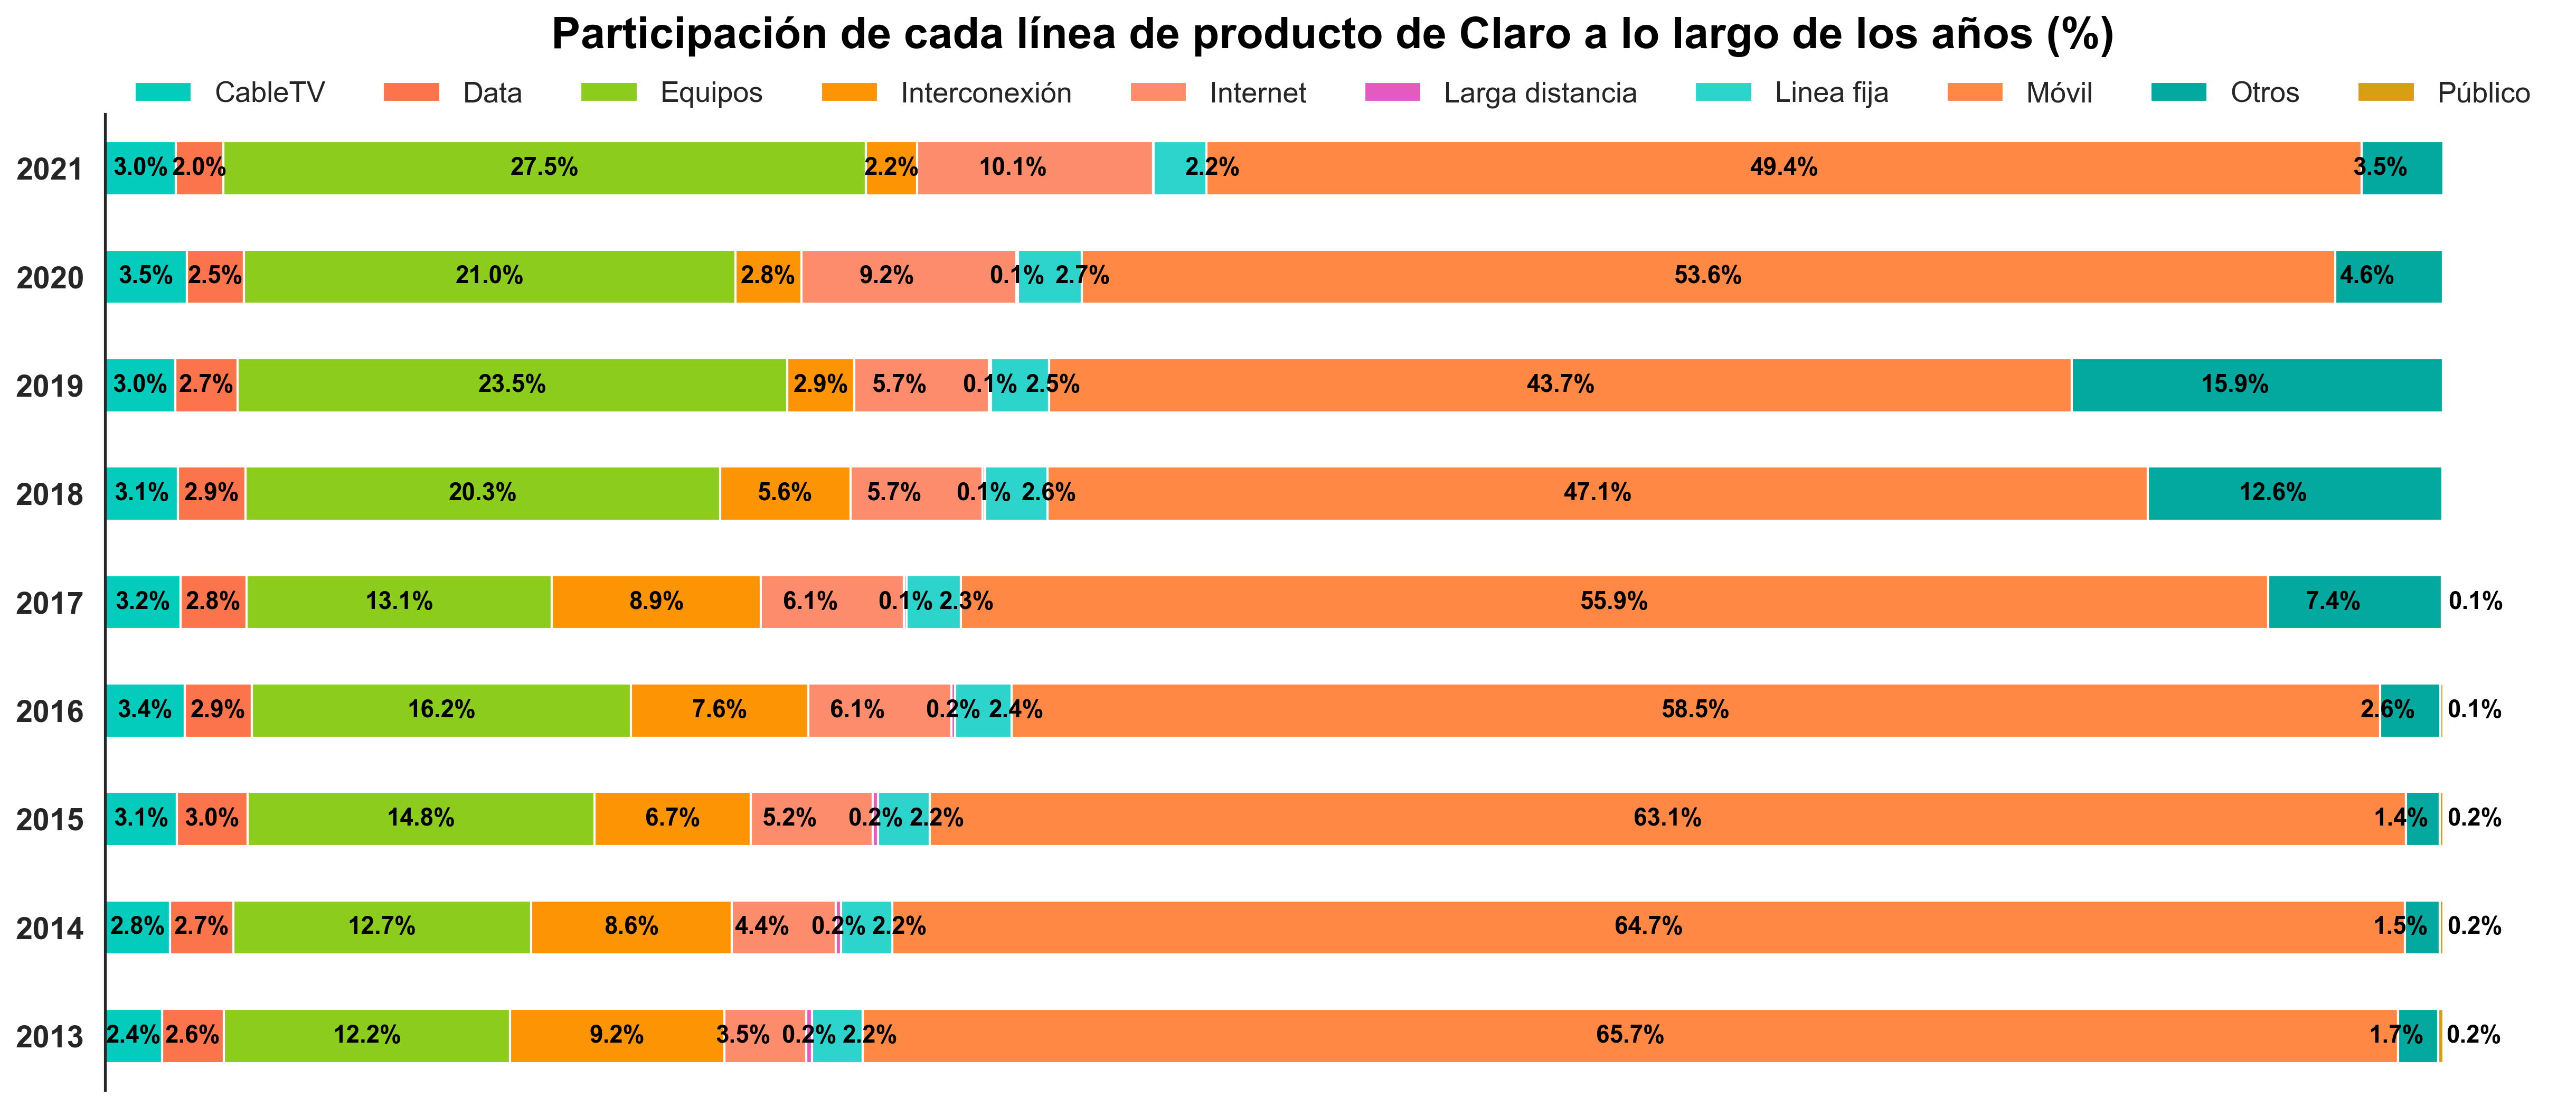

In [77]:
# Gráfico de barras apiladas de la participación de mercado de las líneas de negocio de telecomunicaciones en Perú para Claro
df_pivot = ingresos_claro_lineas_negocio.pivot(index='Año', columns='Linea de producto', values='Porcentaje de facturación(%)').fillna(0)
colors = ['#04ccbc', '#fc744c', '#8ccc1c', '#fc9404', '#fc8c6c', '#e55ac1', '#2cd4cc', '#ff8844', '#03a89e', '#d89f14']
sns.set_theme(style='white', palette='bright')
fig, ax = plt.subplots(figsize=(20,8), dpi=300)
df_pivot.plot(kind='barh', stacked=True, color=colors, ax=ax)
sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participación de cada línea de producto de Claro a lo largo de los años (%)', fontsize=20, weight='bold', pad=30, color='black')
for container in ax.containers:
    if container.get_label() in ['Público','Linea fija']:
        labels = [f'{v:.1f}%' if v > 0.05 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center', padding=15, color='black', fontsize=11, weight='bold')
    elif container.get_label() in ['Internet','Otros']:
        labels = [f'{v:.1f}%' if v > 0.05 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center', padding=-10, color='black', fontsize=11, weight='bold')
    else:
        labels = [f'{v:.1f}%' if v > 0.05 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=11, weight='bold')
# Mover la leyenda debajo del título
ax.legend(bbox_to_anchor=(0.5, 1.06), loc='upper center', ncol=10, fontsize=13, facecolor='white', edgecolor='white')
plt.xticks(fontsize=13, weight='bold')
sns.despine(left=False, bottom=True)
plt.gca().set_xticklabels([])
plt.yticks(fontsize=14, weight='bold')
# Mostrar el gráfico
plt.show()

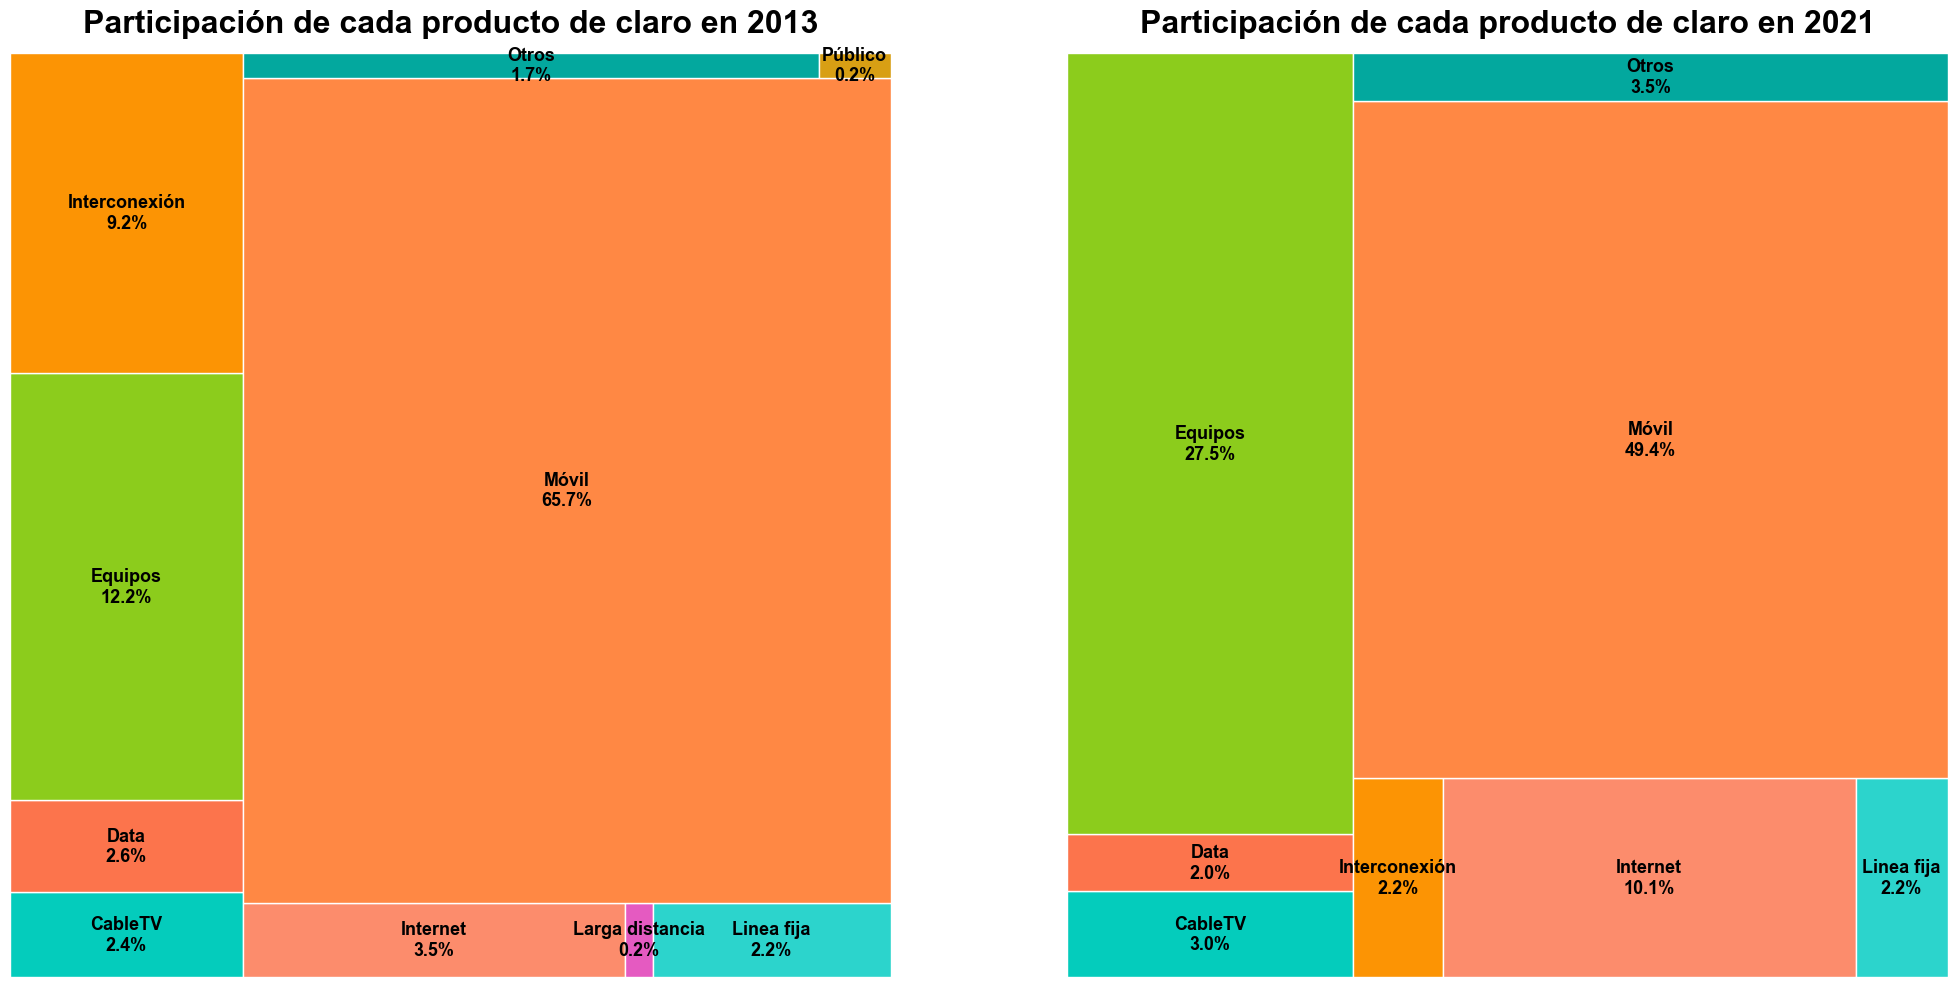

In [78]:
# Tree Map de la participación de mercado de las líneas de negocio en 2013 y 2021 para Claro
df_filtered = ingresos_claro_lineas_negocio[ingresos_claro_lineas_negocio['Año'].isin([2013, 2021])]
df_pivot = df_filtered.pivot(index='Año', columns='Linea de producto', values='Porcentaje de facturación(%)').fillna(0)
colors = ['#04ccbc', '#fc744c', '#8ccc1c', '#fc9404', '#fc8c6c', '#e55ac1', '#2cd4cc', '#ff8844', '#03a89e', '#d89f14']
fig, axes = plt.subplots(1, 2, figsize=(25, 12))

for ax, year in zip(axes, [2013, 2021]):
    values = df_pivot.loc[year].values
    labels = [f"{k}\n{v:.1f}%" for k, v in df_pivot.loc[year].items()]
    color_list = colors
    non_zero_values = [v for v in values if v > 0.04]
    non_zero_labels = [labels[i] for i in range(len(values)) if values[i] > 0.04]
    non_zero_colors = [color_list[i] for i in range(len(values)) if values[i] > 0.04]
    squarify.plot(sizes=non_zero_values, label=non_zero_labels, color=non_zero_colors, ax=ax, text_kwargs={'fontsize': 13, 'weight': 'bold', 'color': 'black'})
    ax.set_title(f'Participación de cada producto de claro en {year}', fontsize=23, weight='bold', color='black', pad=15)
    ax.axis('off')

plt.show()

### **📊 Participación de Cada Producto de Claro en 2013 vs 2021**

A continuación, se presenta un análisis comparativo de la **participación de productos** de Claro entre **2013** y **2021** en el sector de telecomunicaciones en Perú.

#### **📅 Participación en 2013**
- **Móvil:** 🟧 **65.7%** - El servicio móvil dominaba claramente el portafolio de Claro en 2013.
- **Equipos:** 🟩 **12.2%** - Una parte considerable del negocio procedía de la venta de equipos.
- **Interconexión:** 🟧 **9.2%** - También tuvo una participación importante en 2013.
- **Internet:** 🟠 **3.5%** - Una pequeña porción del mercado estaba dedicada a los servicios de internet.
- **Cable TV:** 🟦 **2.4%** - Participación baja en el mercado de televisión por cable.
- **Data:** 🟫 **2.6%** - Servicios de datos con una participación pequeña pero presente.
- **Línea Fija:** 🟪 **0.2%** - Casi insignificante en términos de participación.
- **Larga Distancia:** 🟪 **0.1%** - Prácticamente irrelevante en 2013.
- **Público:** 🟨 **0.2%** - Servicios públicos con participación mínima.
- **Otros:** 🟦 **1.7%** - Otros productos con una pequeña participación.

#### **📅 Participación en 2021**
- **Móvil:** 🟧 **49.4%** - Aunque sigue siendo el principal producto, ha perdido participación (-16.3 puntos porcentuales).
- **Equipos:** 🟩 **27.5%** - Gran aumento en la venta de equipos (+15.3 puntos porcentuales), reflejando una mayor demanda de dispositivos móviles.
- **Internet:** 🟠 **10.1%** - Ha crecido significativamente, mostrando un aumento en la demanda de conectividad (+6.6 puntos porcentuales).
- **Interconexión:** 🟧 **2.2%** - Ha disminuido notablemente respecto a 2013.
- **Cable TV:** 🟦 **3.0%** - Crecimiento leve en el mercado de televisión por cable.
- **Data:** 🟫 **2.0%** - Ligera disminución en la participación de servicios de datos.
- **Línea Fija:** 🟪 **2.2%** - Ha crecido considerablemente, aunque sigue siendo una pequeña parte del mercado.
- **Larga Distancia:** 🟪 **0.0%** - Este servicio ha desaparecido completamente del portafolio.
- **Público:** 🟨 **0.0%** - También ha desaparecido del portafolio de productos de Claro.
- **Otros:** 🟦 **3.5%** - Aumento en la categoría de otros productos.

#### **📌 Observaciones Generales**
- **Móvil** sigue siendo el producto principal de Claro, pero ha perdido una parte significativa de su participación (-16.3 puntos porcentuales) en favor de otros productos, especialmente **Equipos** e **Internet**.
- La participación de **Equipos** ha crecido enormemente, pasando de **12.2%** en 2013 a **27.5%** en 2021, lo que refleja un cambio en la estrategia de ventas de dispositivos.
- **Internet** también ha visto un crecimiento importante, subiendo del **3.5%** en 2013 a **10.1%** en 2021, lo que sugiere un mayor enfoque en servicios de conectividad.
- **Interconexión** ha disminuido notablemente, mientras que **Línea Fija** ha crecido un poco, pero sigue siendo una pequeña parte del negocio.
- Los servicios de **Larga Distancia** y **Público** han desaparecido completamente del portafolio de productos de Claro para 2021.

#### **📈 Conclusión:**
El portafolio de productos de Claro ha experimentado un **cambio importante** entre **2013** y **2021**. Aunque el **Móvil** sigue siendo el producto principal, ha habido una diversificación significativa hacia la venta de **Equipos** y la oferta de servicios de **Internet**, reflejando las nuevas demandas del mercado y el cambio en las prioridades del consumidor.

### **Mercado móvil**📱
1. **Utilizando la data de la pregunta anterior, ¿qué porcentaje del mercado por ingresos, del producto móviles, tenía cada empresa en el 2013? ¿Cuánto tienen en el 2021?**

In [79]:
#Porcentaje de ingreso solo de productos moviles para cada empresa en 2013 y 2021
ingresos_moviles = ingresos[ingresos['Linea de producto'] == 'Móvil'].copy()
ingresos_moviles = ingresos_moviles.groupby(['Año', 'Compañia']).agg({'Ingresos soles': 'sum'}).reset_index()
ingresos_moviles['Porcentaje de facturación(%)'] = ingresos_moviles.groupby('Año')['Ingresos soles'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
print(f'La compañía que más participación de mercado tiene en productos móviles en el Perú en el 2013 es {ingresos_moviles[ingresos_moviles["Año"] == 2013].sort_values("Porcentaje de facturación(%)", ascending=False).iloc[0, 1]}')
print(f'La compañía que más participación de mercado tiene en productos móviles en el Perú en el 2021 es {ingresos_moviles[ingresos_moviles["Año"] == 2021].sort_values("Porcentaje de facturación(%)", ascending=False).iloc[0, 1]}')
ingresos_moviles.head()

La compañía que más participación de mercado tiene en productos móviles en el Perú en el 2013 es Movistar
La compañía que más participación de mercado tiene en productos móviles en el Perú en el 2021 es Claro


Año  Compañia  Ingresos soles  Porcentaje de facturación(%)
0  2013     Claro      3231865503                     41.830997
1  2013     Entel       608200298                      7.872117
2  2013  Movistar      3876234000                     50.171250
3  2013     Otros         9706606                      0.125635
4  2014     Bitel        14699910                      0.174069

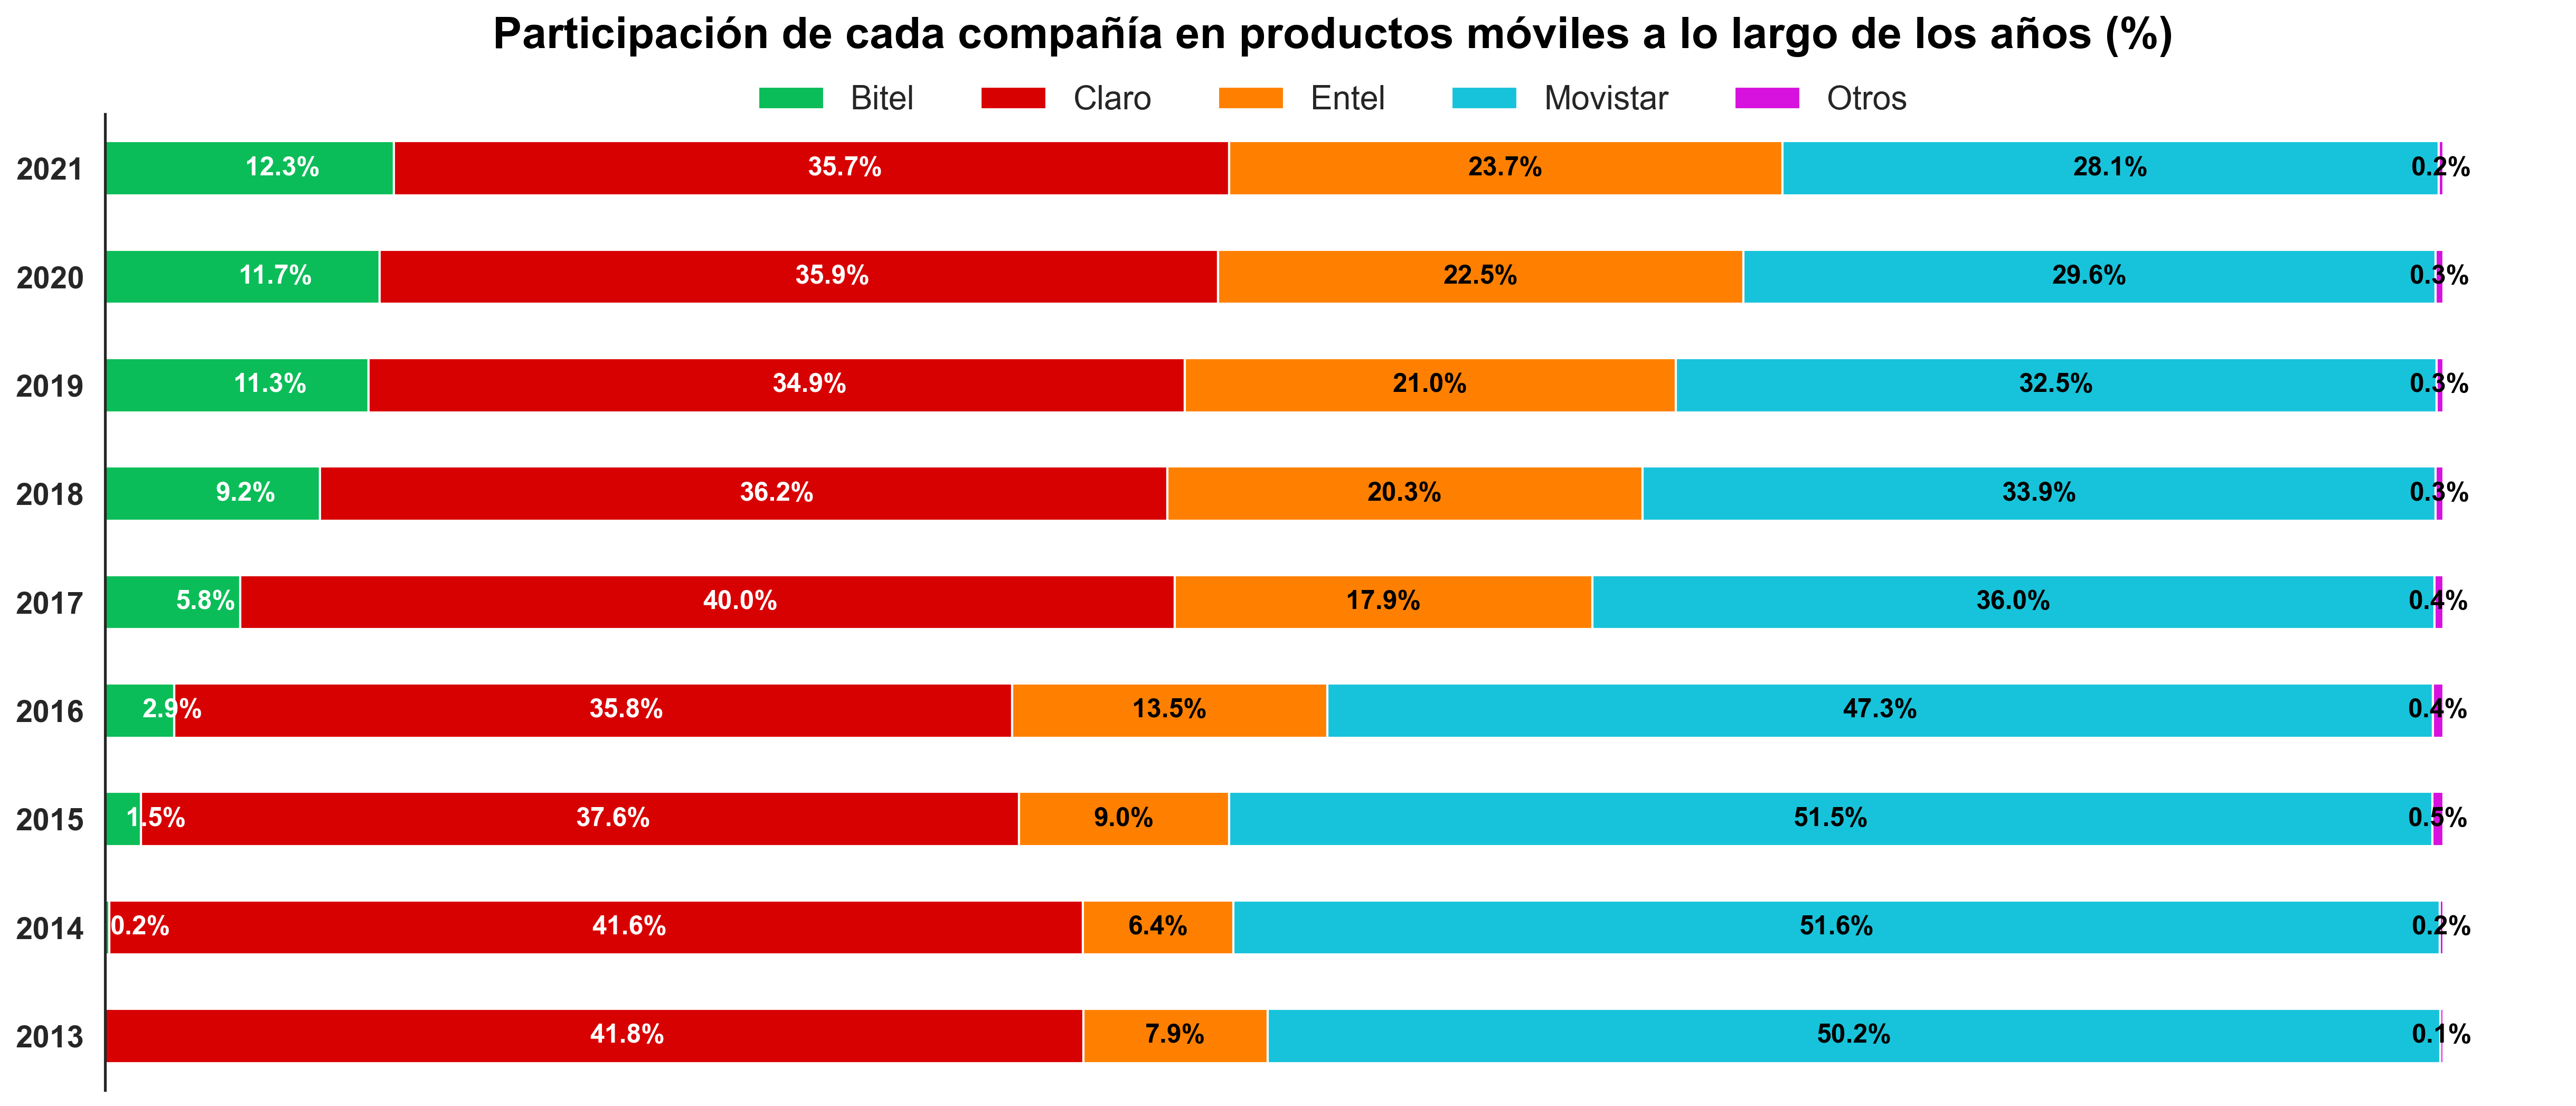

In [91]:
# Gráfico de barras apiladas de la participación de mercado de las compañías de telecomunicaciones en Perú en productos móviles
df_pivot = ingresos_moviles.pivot(index='Año', columns='Compañia', values='Porcentaje de facturación(%)').fillna(0)
colors = {
    'Bitel': '#0bbd58',
    'Claro': '#d80101',
    'DirectTV': '#0b24a8',
    'Entel': '#ff8000',
    'Movistar': '#17c3da',
    'Otros': '#d711de'
}
sns.set_theme(style='white', palette='bright')
fig, ax = plt.subplots(figsize=(20,8), dpi=300)
df_pivot.plot(kind='barh', stacked=True, color=colors, ax=ax)
sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participación de cada compañía en productos móviles a lo largo de los años (%)', fontsize=20, weight='bold', pad=30, color='black')
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    if container.get_label() in ['DirectTV', 'Claro','Bitel']:
        ax.bar_label(container, labels=labels, label_type='center', padding=15,color='white', fontsize=12, weight='bold')
    else:
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=12, weight='bold')

# Mover la leyenda debajo del título
ax.legend(bbox_to_anchor=(0.5, 1.06), loc='upper center', ncol=10, fontsize=15, facecolor='white', edgecolor='white')
plt.xticks(fontsize=13, weight='bold')
sns.despine(left=False, bottom=True)
plt.gca().set_xticklabels([])
plt.yticks(fontsize=14, weight='bold')
# Mostrar el gráfico
plt.show()

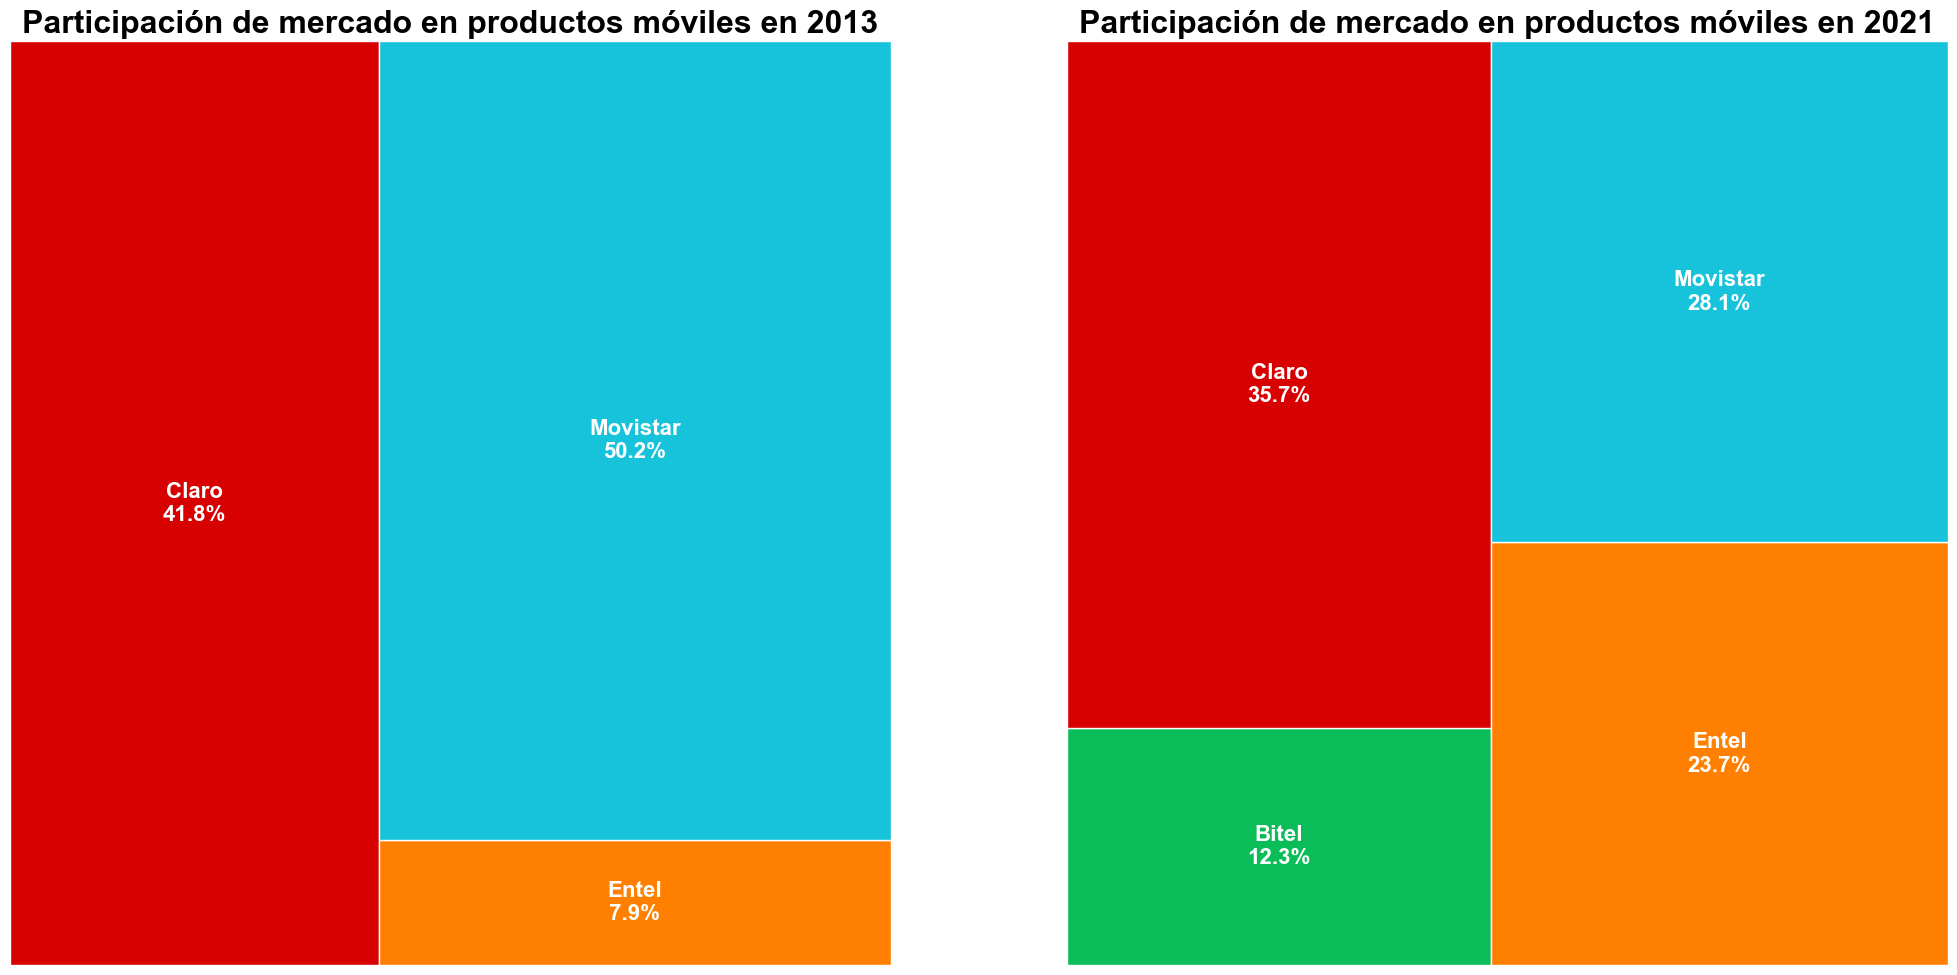

In [81]:
#Tree Map de la participación de mercado de las compañías de telecomunicaciones en Perú en productos móviles en 2013 y 2021
df_filtered = ingresos_moviles[ingresos_moviles['Año'].isin([2013, 2021])]
df_pivot = df_filtered.pivot(index='Año', columns='Compañia', values='Porcentaje de facturación(%)').fillna(0)
colors = {
    'Bitel': '#0bbd58',
    'Claro': '#d80101',
    'DirectTV': '#0b24a8',
    'Entel': '#ff8000',
    'Movistar': '#17c3da',
    'Otros': '#d711de'
}
fig, axes = plt.subplots(1, 2, figsize=(25, 12))
for ax, year in zip(axes, [2013, 2021]):
    values = df_pivot.loc[year].values
    labels = [f"{k}\n{v:.1f}%" for k, v in df_pivot.loc[year].items()]
    color_list = [colors[k] for k in df_pivot.loc[year].index]
    non_zero_values = [v for v in values if v > 0.3]
    non_zero_labels = [labels[i] for i in range(len(values)) if values[i] > 0.3]
    non_zero_colors = [color_list[i] for i in range(len(values)) if values[i] > 0.3]
    squarify.plot(sizes=non_zero_values, label=non_zero_labels, color=non_zero_colors, ax=ax, text_kwargs={'fontsize': 16, 'weight': 'bold', 'color': 'white'})
    ax.set_title(f'Participación de mercado en productos móviles en {year}', fontsize=23, weight='bold', color='black')
    ax.axis('off')
plt.show()

### **📊 Participación de Mercado en Productos Móviles en 2013 vs 2021**

A continuación, se presenta un análisis comparativo de la **participación de mercado** en productos móviles entre **2013** y **2021** en Perú.

#### **📅 Participación en 2013**
- **Movistar:** 🟦 **50.2%** - Movistar dominaba el mercado de productos móviles en 2013, con más de la mitad del total.
- **Claro:** 🟥 **41.8%** - Claro era el segundo jugador más grande, con una participación significativa.
- **Entel:** 🟧 **7.9%** - Entel tenía una pequeña participación, pero ya estaba presente en el mercado móvil.

#### **📅 Participación en 2021**
- **Movistar:** 🟦 **28.1%** - Aunque sigue siendo un jugador importante, Movistar ha perdido una gran parte de su cuota de mercado (-22.1 puntos porcentuales).
- **Claro:** 🟥 **35.7%** - Claro también ha perdido participación, aunque de manera menos pronunciada (-6.1 puntos porcentuales).
- **Entel:** 🟧 **23.7%** - Gran crecimiento en la participación de Entel, que ha triplicado su cuota de mercado desde 2013 (+15.8 puntos porcentuales).
- **Bitel:** 🟩 **12.3%** - Bitel, que no estaba presente en 2013, ha capturado una porción significativa del mercado en 2021.

#### **📌 Observaciones Generales**
- **Movistar** ha experimentado una pérdida significativa de participación de mercado, pasando de **50.2%** en 2013 a **28.1%** en 2021.
- **Claro** también ha visto una disminución en su cuota de mercado, aunque su posición sigue siendo fuerte.
- **Entel** ha crecido enormemente, pasando de **7.9%** en 2013 a **23.7%** en 2021, lo que refleja una clara expansión de su presencia en el mercado móvil.
- **Bitel** ha surgido como un nuevo competidor relevante, logrando capturar un **12.3%** del mercado en 2021.

#### **📈 Conclusión:**
El mercado de productos móviles en Perú ha experimentado una **redistribución significativa** entre **2013** y **2021**. **Movistar** y **Claro** han perdido participación de mercado, mientras que **Entel** ha experimentado un crecimiento considerable y **Bitel** ha entrado al mercado con una fuerte presencia. Esto refleja un aumento en la competencia y la diversificación del mercado de telecomunicaciones en Perú.

2. **Utilizando el segundo dataset, cuál es la tasa de crecimiento del mercado de líneas móviles por todo tipo de contrato entre 2013-2021. (linea de crecimiento)**

In [82]:
#utilizando el segundo dataset, cuál es la tasa de crecimiento del mercado de líneas móviles por todo tipo de contrato entre 2013-2021
moviles_total_anual = moviles.groupby(['Año']).agg({'Numero de lineas':'sum'}).reset_index()
moviles_total_anual['Tasa de crecimiento(%)'] = moviles_total_anual['Numero de lineas'].pct_change()*100
moviles_total_anual = moviles_total_anual[moviles_total_anual['Año'] < 2022]
print(f'La tasa de crecimiento anual promedio de las líneas móviles en el Perú es de {round(moviles_total_anual["Tasa de crecimiento(%)"].mean(),2)}%')
moviles_total_anual

La tasa de crecimiento anual promedio de las líneas móviles en el Perú es de 4.35%


Año  Numero de lineas  Tasa de crecimiento(%)
0  2013         355612200                     NaN
1  2014         368970033                3.756292
2  2015         393966052                6.774539
3  2016         434117472               10.191594
4  2017         456024126                5.046250
5  2018         488355303                7.089795
6  2019         500251581                2.435988
7  2020         458601225               -8.325882
8  2021         494401010                7.806299

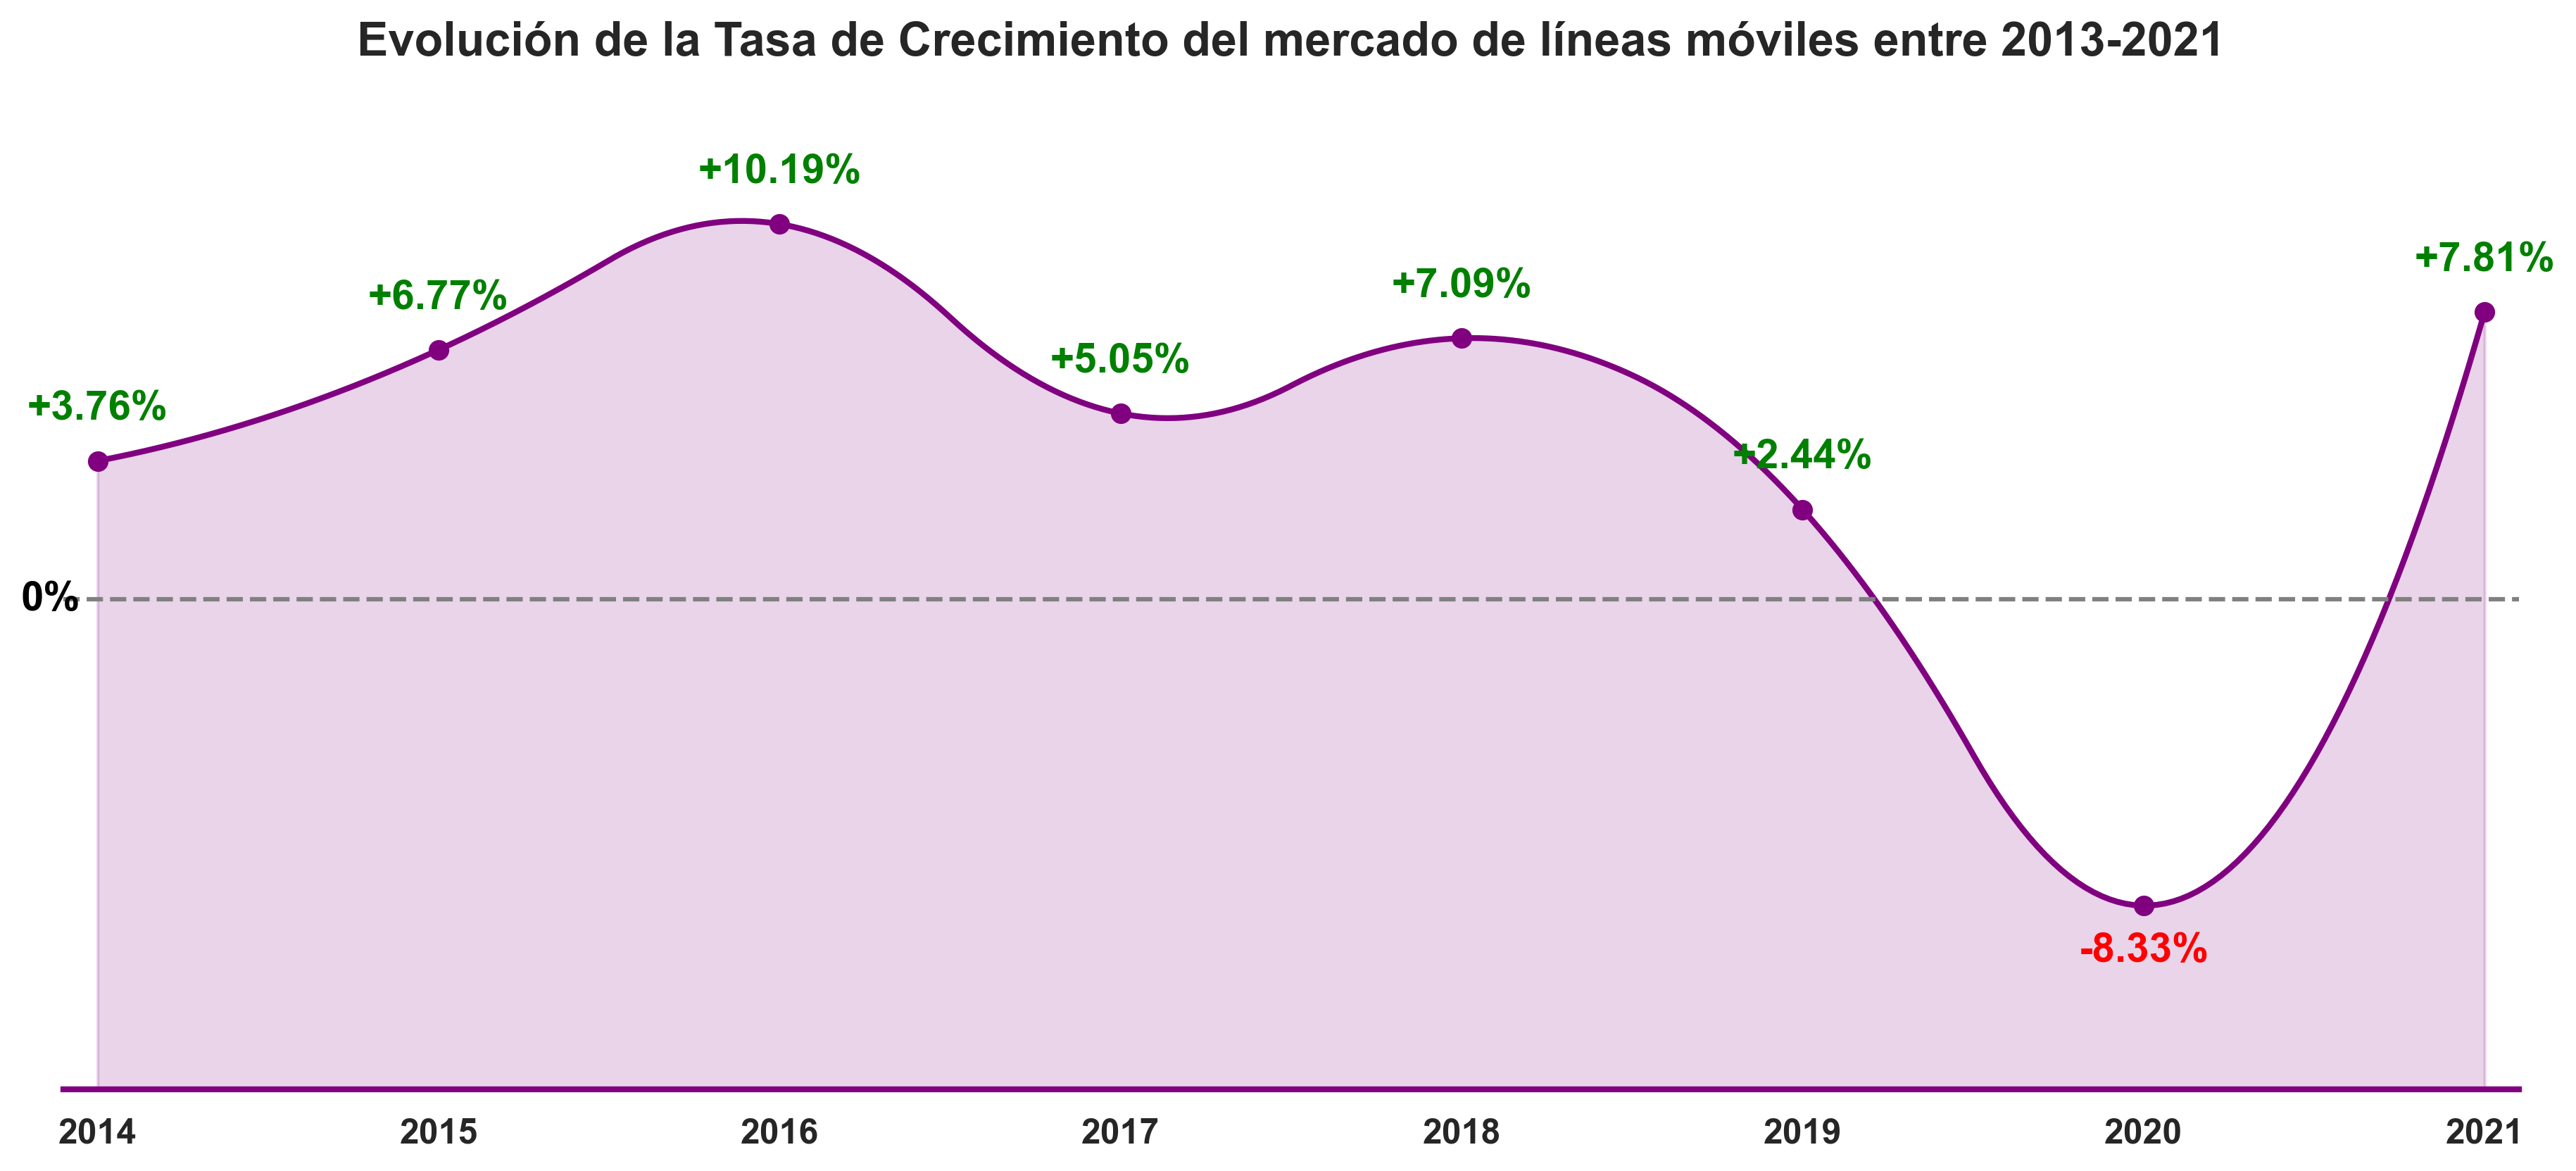

In [83]:
# Graficando la evolución
moviles_total_anual = moviles_total_anual.dropna().sort_values(by='Año')
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(15, 6), dpi=300)
x = moviles_total_anual['Año']
y = moviles_total_anual['Tasa de crecimiento(%)']

# Crear una línea suavizada
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=2)  # B-spline de grado 2
y_smooth = spl(x_new)

plt.plot(x_new, y_smooth, color='purple', linewidth=2)
plt.scatter(x, y, color='purple')  # Puntos originales

# Añadir etiquetas a los puntos
for x_val, y_val in zip(x, y):
    if y_val > 0:
        plt.text(x_val, y_val + 0.9, f'+{y_val:.2f}%', ha='center', va='bottom', fontsize=14, weight='bold', color='green')
    else:
        plt.text(x_val, y_val - 0.7, f'{y_val:.2f}%', ha='center', va='top', fontsize=14, weight='bold', color='red')

# Ajustar los límites del eje y
plt.ylim(y.min() - 5, y.max() + 3)

# Ajustar los límites del eje x
plt.xlim(x.min()-0.1, x.max()+0.1)

# Crear un efecto desenfocado de color hacia abajo desde la línea del gráfico
ax = plt.gca()
ax.set_facecolor('white')
ax.patch.set_alpha(0.5)
for spine in ax.spines.values():
    spine.set_edgecolor('purple')
    spine.set_linewidth(2)
    spine.set_visible(True)

# Rellenar el área bajo la curva con un gradiente de color uniforme
plt.fill_between(x_new, y_smooth, y.min() - 5, color='purple', alpha=0.17)

sns.despine(left=True)
plt.title('Evolución de la Tasa de Crecimiento del mercado de líneas móviles entre 2013-2021', fontsize=16, weight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.axhline(0, color='gray', linewidth=1.5, linestyle='--')
plt.text(x.min()-0.05, 0, '0%', ha='right', va='center', fontsize=14, color='black', weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.gca().set_yticklabels([])

# Mostrar el gráfico
plt.show()

### **📊 Evolución de la Tasa de Crecimiento del Mercado de Líneas Móviles (2013-2021)**

Este gráfico muestra la **tasa de crecimiento** del mercado de líneas móviles en Perú entre **2013** y **2021**, destacando los años con crecimiento positivo y negativo. A continuación se desglosan los puntos más relevantes:

#### **📈 Años de Crecimiento Positivo**
- **2014:** 🟢 **+3.76%** - El mercado arrancó con un crecimiento moderado.
- **2015:** 🟢 **+6.77%** - Crecimiento más acelerado en comparación con el año anterior.
- **2016:** 🟢 **+10.19%** - El punto más alto de crecimiento durante el período observado.
- **2017:** 🟢 **+5.05%** - Aunque menor que el año anterior, el mercado sigue en expansión.
- **2018:** 🟢 **+7.09%** - Recuperación en la tasa de crecimiento después de la desaceleración de 2017.
- **2019:** 🟢 **+2.44%** - Una desaceleración significativa, pero aún en terreno positivo.
- **2021:** 🟢 **+7.81%** - Fuerte recuperación después de la caída en 2020, con una de las tasas más altas del período.

#### **📉 Año de Crecimiento Negativo**
- **2020:** 🔴 **-8.33%** - El año con la mayor caída en la tasa de crecimiento, probablemente debido a la pandemia de **COVID-19** y sus efectos en la economía y la demanda de líneas móviles.

#### **📌 Observaciones Generales**
- El **pico de crecimiento** más alto se produjo en **2016** con un **+10.19%**, mientras que la **caída más pronunciada** ocurrió en **2020** con un **-8.33%**.
- Después de la fuerte contracción en **2020**, el mercado mostró una **rápida recuperación** en **2021** con un crecimiento de **+7.81%**.
- A lo largo del período, el mercado experimentó ciclos de **crecimiento y desaceleración**, con una tendencia general positiva hasta el impacto de la pandemia en **2020**.

#### **📈 Conclusión:**
El mercado de líneas móviles en Perú ha mostrado un **crecimiento constante** a lo largo de los años, a excepción de **2020**, cuando sufrió una contracción significativa. Sin embargo, el mercado se recuperó rápidamente en **2021**, lo que indica su **resiliencia** y la **importancia creciente** de los servicios móviles en la vida diaria, especialmente tras la pandemia.

3. **¿Cuál es el porcentaje de líneas activas por empresa en 2021? Compararlo con el 2013. (pie chart o joint bars)**


In [84]:
#Porcentaje de lineas activas por empresa en 2013 y 2021
lineas_activas = moviles.groupby(['Año', 'Compañia']).agg({'Numero de lineas':'sum'}).reset_index()
lineas_activas['Porcentaje de lineas(%)'] = lineas_activas.groupby('Año')['Numero de lineas'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
lineas_activas.head()

Año  Compañia  Numero de lineas  Porcentaje de lineas(%)
0  2013     Claro         144001220                40.493892
1  2013     Entel          19123734                 5.377693
2  2013  Movistar         192487246                54.128415
3  2014     Bitel            771370                 0.209060
4  2014     Claro         146187130                39.620326

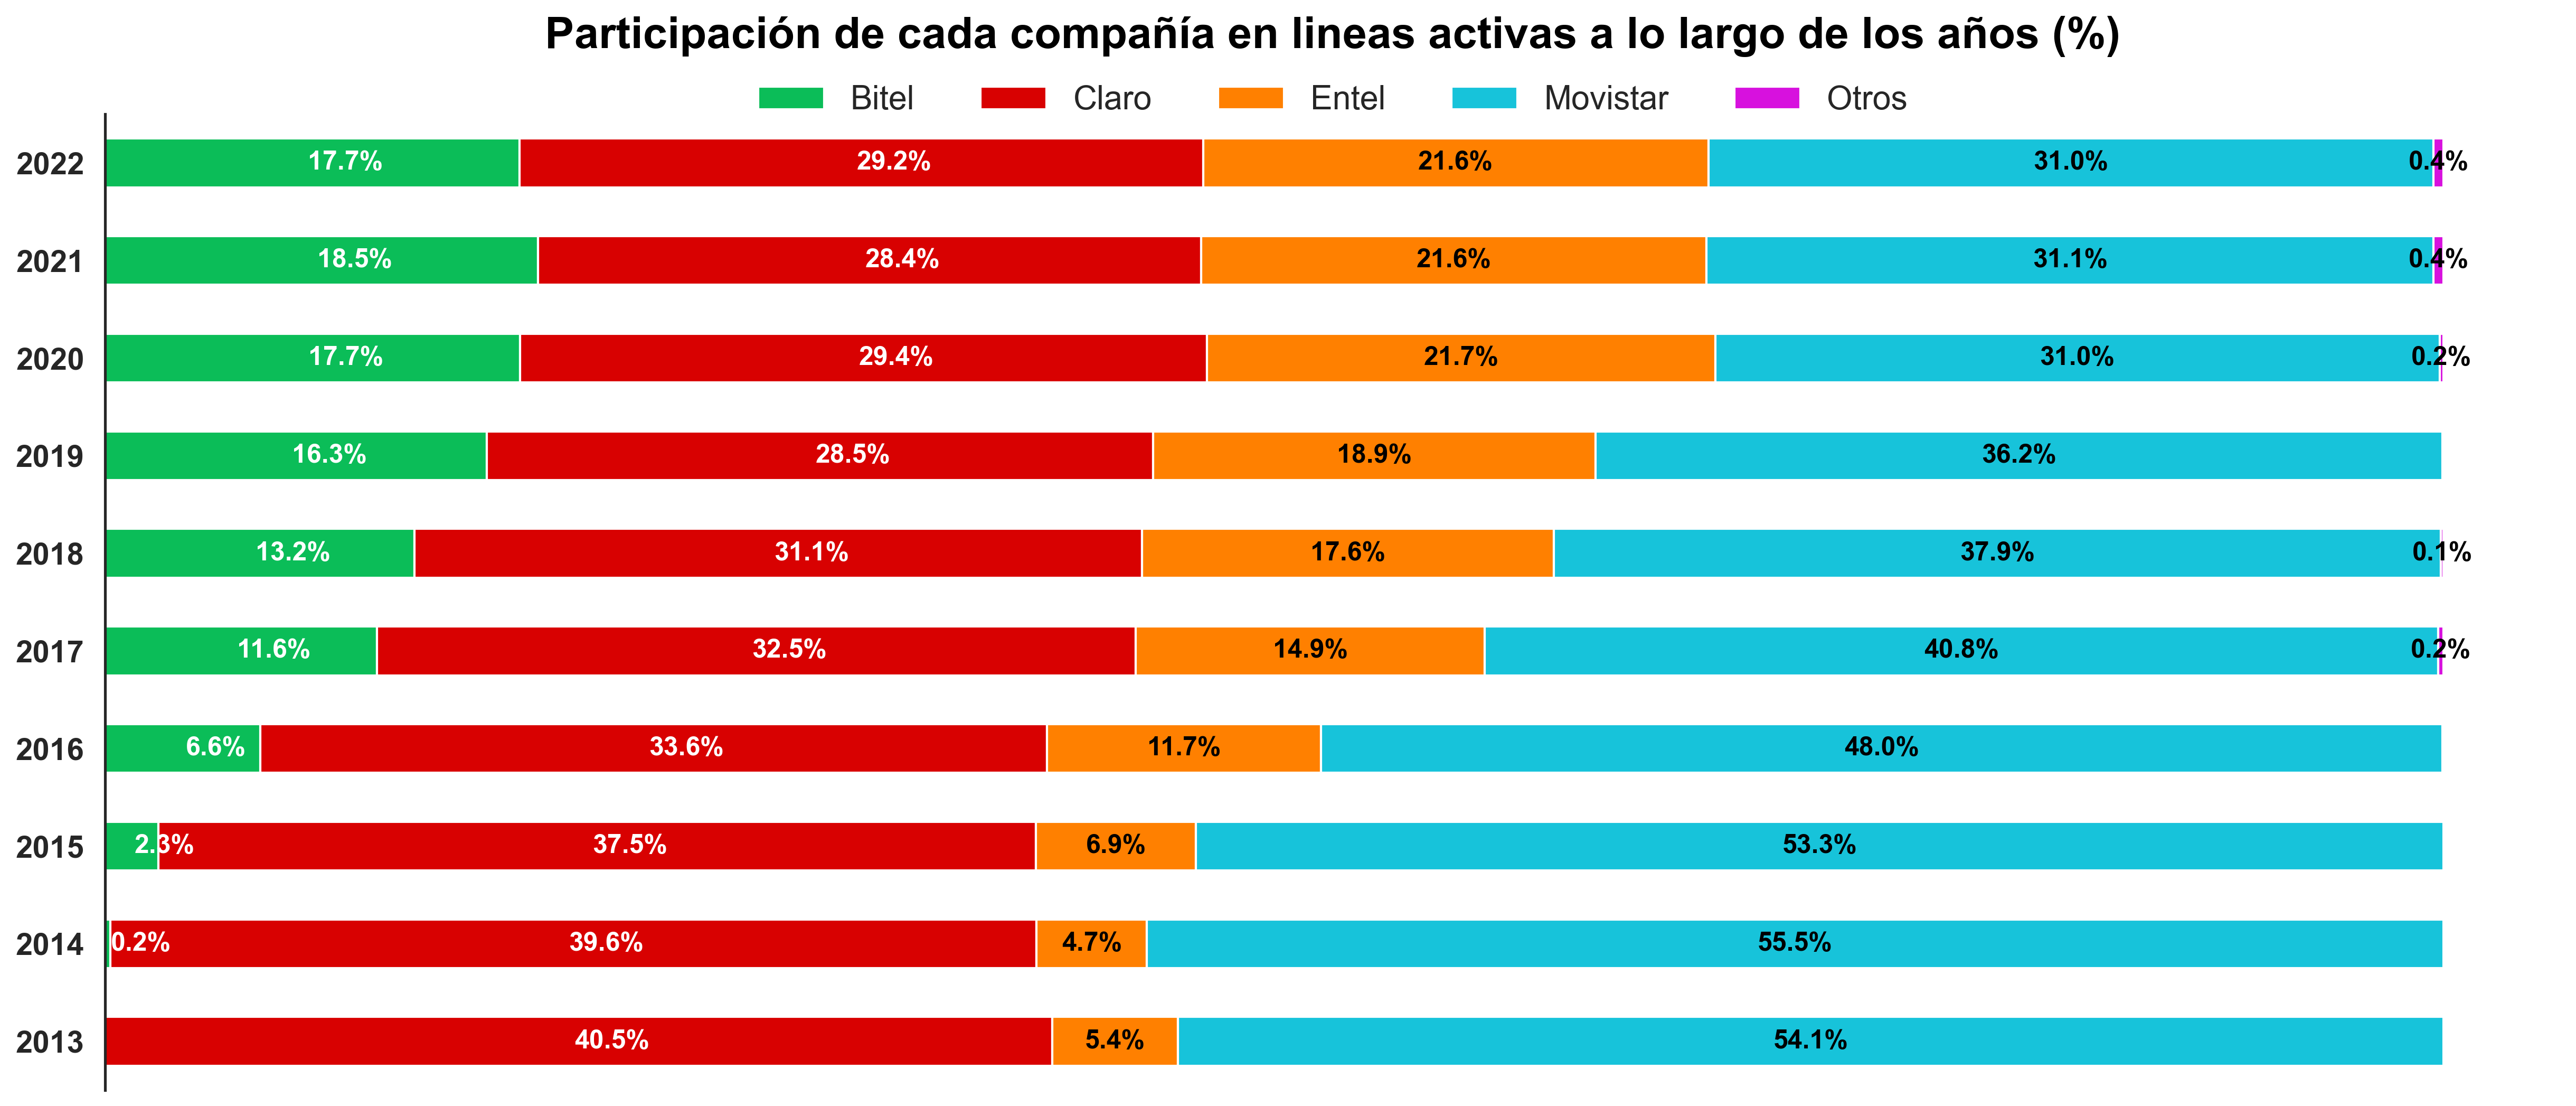

In [85]:
# Gráfico de barras apiladas de lineas activas de las compañías de telecomunicaciones en Perú en productos móviles
df_pivot = lineas_activas.pivot(index='Año', columns='Compañia', values='Porcentaje de lineas(%)').fillna(0)
colors = {
    'Bitel': '#0bbd58',
    'Claro': '#d80101',
    'DirectTV': '#0b24a8',
    'Entel': '#ff8000',
    'Movistar': '#17c3da',
    'Otros': '#d711de'
}
sns.set_theme(style='white', palette='bright')
fig, ax = plt.subplots(figsize=(20,8), dpi=300)
df_pivot.plot(kind='barh', stacked=True, color=colors, ax=ax)
sns.despine(left=True, bottom=True)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Participación de cada compañía en lineas activas a lo largo de los años (%)', fontsize=20, weight='bold', pad=30, color='black')
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 0.05 else '' for v in container.datavalues]
    if container.get_label() in ['DirectTV', 'Claro','Bitel']:
        ax.bar_label(container, labels=labels, label_type='center', padding=15,color='white', fontsize=12, weight='bold')
    else:
        ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=12, weight='bold')
        # Mover la leyenda debajo del título
ax.legend(bbox_to_anchor=(0.5, 1.06), loc='upper center', ncol=10, fontsize=15, facecolor='white', edgecolor='white')
plt.xticks(fontsize=13, weight='bold')
sns.despine(left=False, bottom=True)
plt.gca().set_xticklabels([])
plt.yticks(fontsize=14, weight='bold')
# Mostrar el gráfico
plt.show()

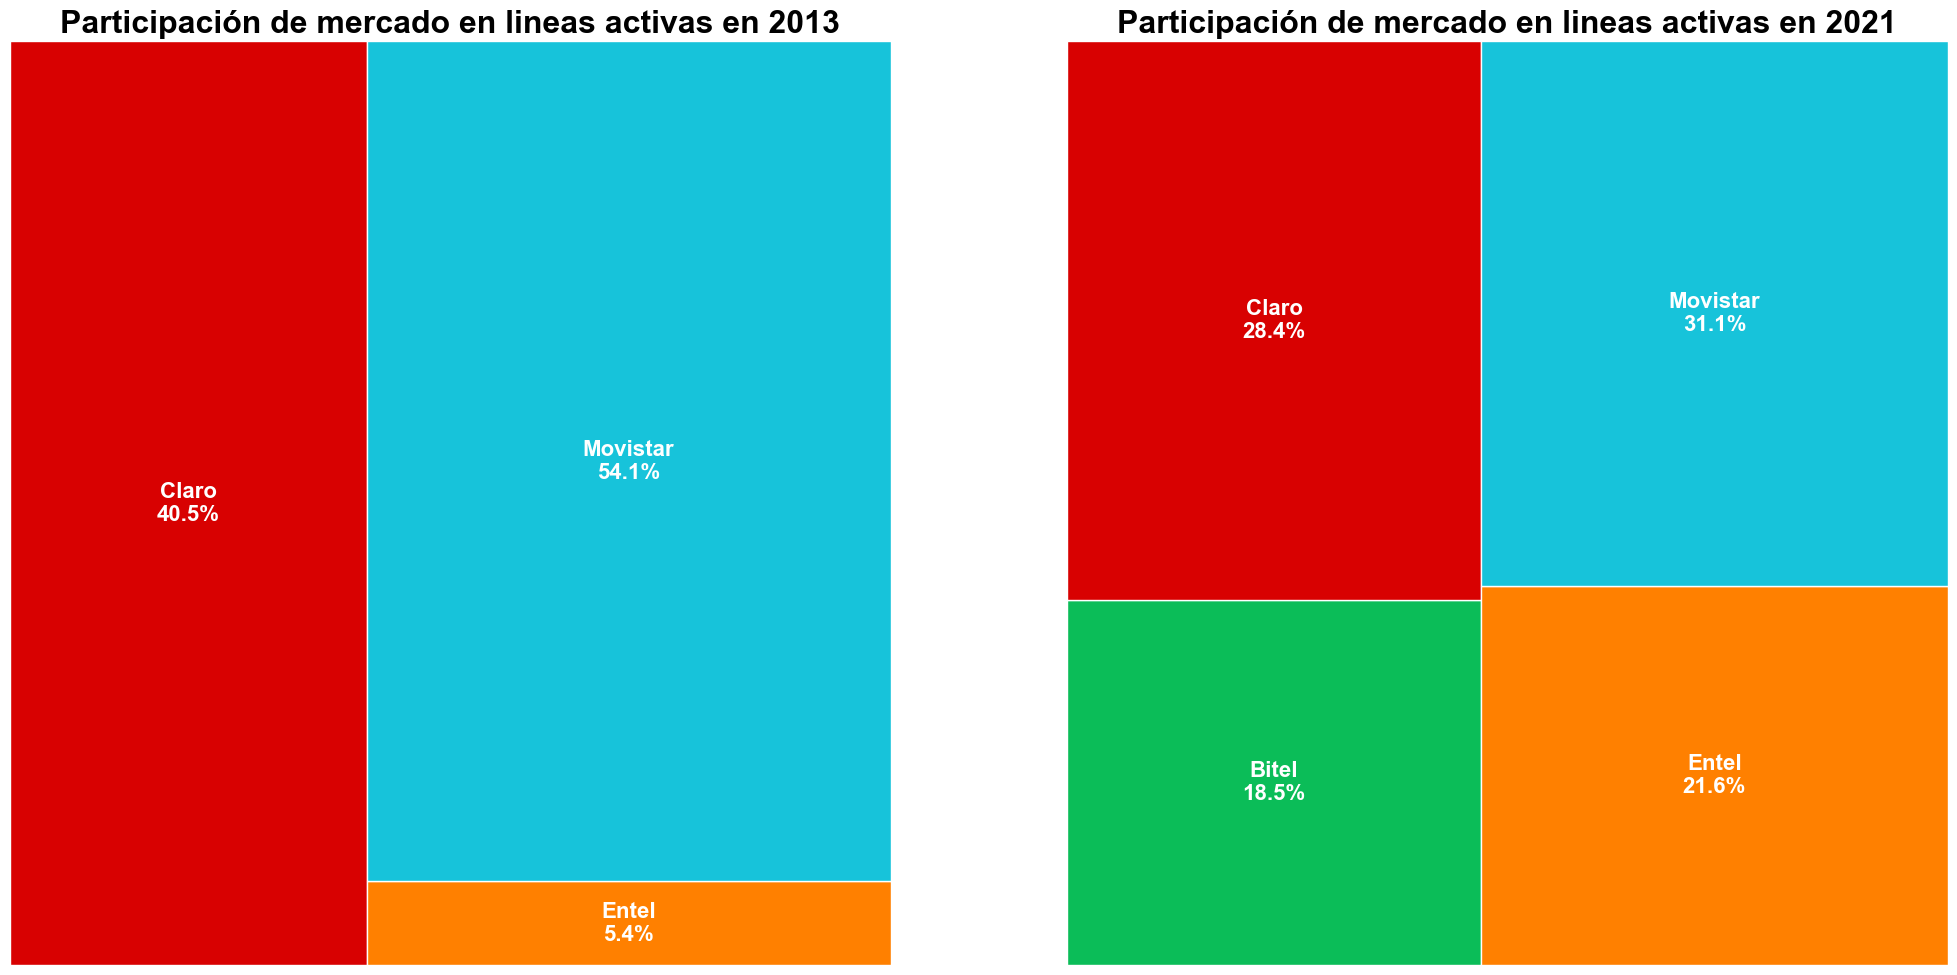

In [86]:
#tree map de la participación de mercado de las compañías de telecomunicaciones en Perú en lineas activas en 2013 y 2021
df_filtered = lineas_activas[lineas_activas['Año'].isin([2013, 2021])]
df_pivot = df_filtered.pivot(index='Año', columns='Compañia', values='Porcentaje de lineas(%)').fillna(0)
colors = {
    'Bitel': '#0bbd58',
    'Claro': '#d80101',
    'DirectTV': '#0b24a8',
    'Entel': '#ff8000',
    'Movistar': '#17c3da',
    'Otros': '#d711de'
}
fig, axes = plt.subplots(1, 2, figsize=(25, 12))
for ax, year in zip(axes, [2013, 2021]):
    values = df_pivot.loc[year].values
    labels = [f"{k}\n{v:.1f}%" for k, v in df_pivot.loc[year].items()]
    color_list = [colors[k] for k in df_pivot.loc[year].index]
    non_zero_values = [v for v in values if v > 0.5]
    non_zero_labels = [labels[i] for i in range(len(values)) if values[i] > 0.5]
    non_zero_colors = [color_list[i] for i in range(len(values)) if values[i] > 0.5]
    squarify.plot(sizes=non_zero_values, label=non_zero_labels, color=non_zero_colors, ax=ax, text_kwargs={'fontsize': 16, 'weight': 'bold', 'color': 'white'})
    ax.set_title(f'Participación de mercado en lineas activas en {year}', fontsize=23, weight='bold', color='black')
    ax.axis('off')
plt.show()

### **📊 Participación de Mercado en Líneas Activas en 2013 vs 2021**

A continuación, se presenta un análisis comparativo de la **participación de mercado** en líneas móviles activas entre **2013** y **2021** en Perú.

#### **📅 Participación en 2013**
- **Movistar:** 🟦 **54.1%** - Movistar dominaba ampliamente el mercado de líneas activas en 2013, con más de la mitad de la participación.
- **Claro:** 🟥 **40.5%** - Claro estaba en la segunda posición, también con una participación importante.
- **Entel:** 🟧 **5.4%** - Entel tenía una pequeña participación en el mercado de líneas activas.

#### **📅 Participación en 2021**
- **Movistar:** 🟦 **31.1%** - Aunque sigue siendo el líder del mercado, Movistar ha perdido una gran parte de su cuota (-23.0 puntos porcentuales).
- **Claro:** 🟥 **28.4%** - Claro también ha perdido participación (-12.1 puntos porcentuales), aunque sigue manteniendo una posición relevante.
- **Entel:** 🟧 **21.6%** - Entel ha experimentado un crecimiento enorme, cuadruplicando su cuota de mercado (+16.2 puntos porcentuales).
- **Bitel:** 🟩 **18.5%** - Bitel, que no estaba presente en 2013, ha capturado una porción significativa del mercado en 2021.

#### **📌 Observaciones Generales**
- **Movistar** ha perdido una gran parte de su cuota de mercado, pasando de **54.1%** en 2013 a **31.1%** en 2021. Aunque sigue siendo el líder, su dominio ha disminuido drásticamente.
- **Claro** ha seguido una tendencia similar, perdiendo participación de mercado, aunque de manera menos pronunciada que Movistar.
- **Entel** ha logrado un **crecimiento significativo**, pasando de **5.4%** en 2013 a **21.6%** en 2021, consolidándose como un competidor fuerte.
- **Bitel** ha entrado en el mercado con fuerza, capturando un **18.5%** del mercado de líneas activas en 2021, lo que demuestra la creciente competencia en el sector.

#### **📈 Conclusión:**
El mercado de líneas móviles activas en Perú ha experimentado una **redistribución significativa** entre **2013** y **2021**. **Movistar** y **Claro** han visto una disminución en su participación, mientras que **Entel** y **Bitel** han crecido considerablemente, lo que refleja un mercado más competitivo y diversificado.

4. **Si dividimos los ingresos anuales por el número de líneas para cada empresa, tenemos el ingreso promedio por línea.  ¿Qué conclusiones podemos sacar comparando el 2013 con el 2021 por cada empresa? (barras horizontales)**

In [129]:
#Dividiendo los ingresos anuales por el número de lineas activas para obtener el ingreso promedio por linea activa para cada empresa en 2013 y 2021
ingresos_linea_activa = ingresos[ingresos['Linea de producto'] == 'Móvil'].copy()
ingresos_linea_activa = ingresos_linea_activa.groupby(['Año', 'Compañia']).agg({'Ingresos soles': 'sum'}).reset_index()
lineas_activas = moviles.groupby(['Año', 'Compañia']).agg({'Numero de lineas':'sum'}).reset_index()
ingresos_linea_activa = pd.merge(ingresos_linea_activa, lineas_activas, on=['Año', 'Compañia'])
ingresos_linea_activa['Ingreso promedio por linea activa'] = ingresos_linea_activa['Ingresos soles'] / ingresos_linea_activa['Numero de lineas']
ingresos_linea_activa.head()

Año  Compañia  Ingresos soles  Numero de lineas  \
0  2013     Claro      3231865503         144001220   
1  2013     Entel       608200298          19123734   
2  2013  Movistar      3876234000         192487246   
3  2014     Bitel        14699910            771370   
4  2014     Claro      3516893188         146187130   

   Ingreso promedio por linea activa  
0                          22.443320  
1                          31.803428  
2                          20.137615  
3                          19.056886  
4                          24.057475

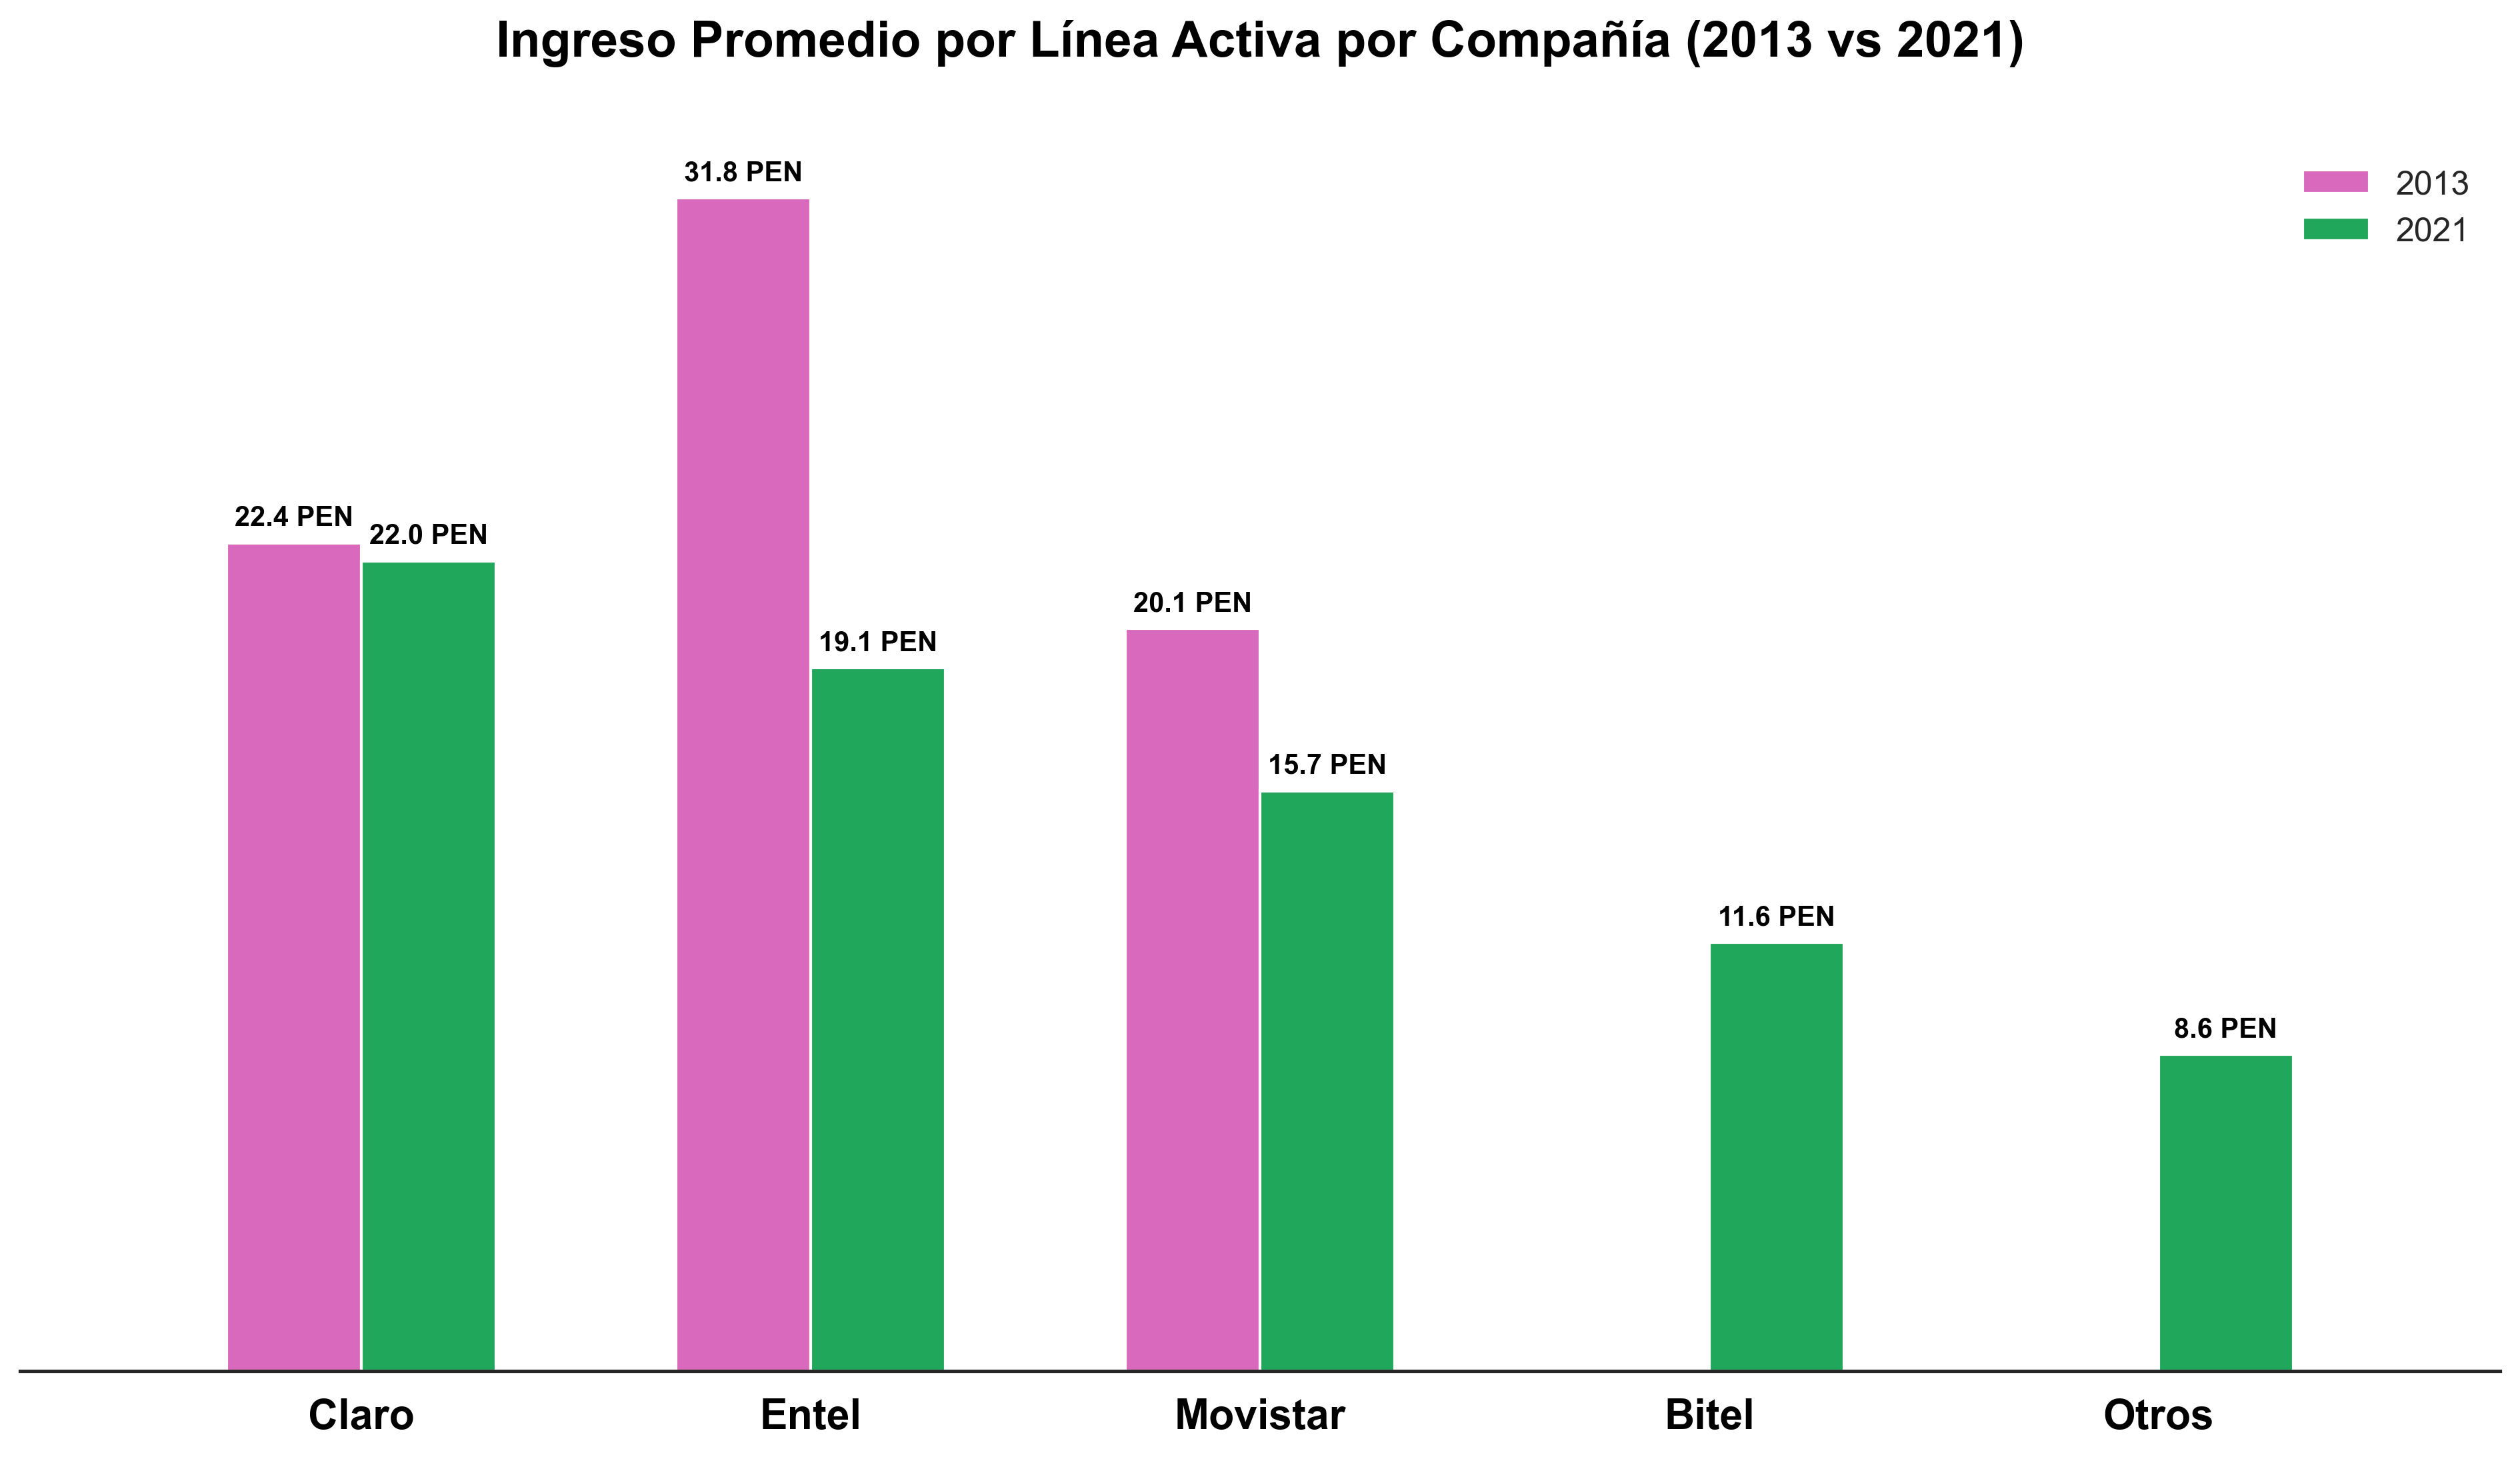

In [137]:
# Filtrar los datos para los años 2013 y 2021 (ejemplo)
ingresos_2013_2021 = ingresos_linea_activa[
    (ingresos_linea_activa['Año'].isin([2013, 2021]))
]

# Crear el gráfico de barras
sns.set_theme(style='white', palette='bright')
plt.figure(figsize=(16, 8), dpi=300)

ax = sns.barplot(
    x='Compañia', 
    y='Ingreso promedio por linea activa', 
    hue='Año', 
    data=ingresos_2013_2021, 
    palette=['#eb56c5', '#0bbd58'],
    dodge=True,
    width=0.6 
)

# Añadir etiquetas y título
plt.xlabel('')
plt.ylabel('')
plt.title('Ingreso Promedio por Línea Activa por Compañía (2013 vs 2021)', fontsize=18, color='black', weight='bold', pad=30)
plt.xticks(fontsize=15, weight='bold', color='black')
plt.yticks(fontsize=12, weight='bold')

# Añadir los valores encima de las barras
for p in ax.patches:
    value = p.get_height()
    if value > 0:  # Solo anotar si el valor es mayor que 0
        ax.annotate(f'{value:.1f} PEN', 
                    (p.get_x() + p.get_width() / 2., value), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points', 
                    fontsize=10, color='black', weight='bold')

# Ajustar el espaciado entre las barras
plt.gca().set_facecolor('none')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.margins(x=0.1)  # Ajustar el margen horizontal

# Ajustar el eje y para que comience en 0
ax.set_ylim(bottom=0)

# Mostrar el gráfico
plt.legend(fontsize=12, title_fontsize='30', loc='upper right', facecolor='white', edgecolor='white')
sns.despine(bottom=False, left=True)
plt.gca().set_yticklabels([])  
plt.show()